# Build a model to classify the price of the Mobile phone. 





# Objective: -
Mobile phones are the best selling electronic devices as people keep updating their cell phones whenever they find new features in a new device. Thousands of mobiles are sold daily, in such a situation it is a very difficult task for someone who is planning to set up their own mobile phone business to decide what the price of the mobile should be.


The price of a product is the most important attribute of marketing that product. One of those products where price matters a lot is a smartphone because it comes with a lot of features so that a company thinks a lot about how to price this mobile which can justify the features and also cover the marketing and manufacturing costs of the mobile.

The goal of this challenge is to build a machine learning model that classify the price of Mobile Phones.
Further accurate classification of price can help the customer in purchasing the Mobile Phone according to their budget.

# Dataset: -

The dataset used in this model is publicly available on Kaggle.

Attribute Information:
1. Price
- 0 for Low Price
- 1 for Medium Price
- 2 for High Price
- 3 for Very High Price


**Twenty real-valued features:**

1) Battery_Power: Total energy a battery can store in one time measured in mAh
2) Blu : Has bluetooth or not
3) Clock_speed : speed at which microprocessor executes instructions
4) dual_sim : Has dual sim support or not
5) fc : Front camera mega pixels
6) four_g : Has 4G or not
7) int_memory : Internal memory in gigabytes
8) m_dep : Mobile depth in cm
9) mobile_wt : Weight of mobile phone
10) n_cores : Number of cores of processor
11) pc : Primary camera mega pixels
12) px_height : Pixel resolution height
13) px_width : Pixel resolution width
14) ram : Random Access Memory in mega bytes
15) Sc_h: Screen height of mobile in cm
16) Sc_w : Screen width of mobile in cm
17) talk_time : longest time that a single battery change will last when you are
18) three_g : Has 3G or not
19) touch_screen : Has touch screen or not
20) wifi : Has wifi or not

# Step 1: Import all the required libraries

- __Pandas__ : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- __Sklearn__ : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- __Pickle__ : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- __Matplotlib__ : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

In [1]:
#Loading libraries 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score
import warnings

warnings.filterwarnings('ignore')

# Step 2 : Read dataset and basic details of dataset
Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.


In this stage we are going to read our problem dataset and have a look on it.

In [2]:
#loading the dataset
try:
    df = pd.read_csv('C:/My Sample Notebook/Notebook Template/Mobile Price Classification/data/mobile_prices.csv') #Path for the file
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")   

Data read done successfully...


In [3]:
# To view the content inside the dataset we can use the head() method that returns a specified number of rows, string from the top. 
# The head() method returns the first 5 rows if a number is not specified.
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

# Step3: Data Preprocessing

**Why need of Data Preprocessing?**

Preprocessing data is an important step for data analysis. The following are some benefits of preprocessing data:

 - It improves accuracy and reliability. Preprocessing data removes missing or inconsistent data values resulting from human or computer error, which can improve the accuracy and quality of a dataset, making it more reliable.
 - It makes data consistent. When collecting data, it's possible to have data duplicates, and discarding them during preprocessing can ensure the data values for analysis are consistent, which helps produce accurate results.
 - It increases the data's algorithm readability. Preprocessing enhances the data's quality and makes it easier for machine learning algorithms to read, use, and interpret it.

Axis are defined for arrays with more than one dimension. A 2-dimensional array has two corresponding axes: the first running vertically downwards across rows (axis 0) 
and the second running horizontally across columns (axis 1).

After we read the data, we can look at the data using:

In [4]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 2000 rows and 21 columns


#### By analysing the problem statement and the dataset, we get to know that the target variable is "price_range" column which says if the price is (0 = Low price) or (1 = Medium price) or (2=High price) or (3=Very High Price).

In [5]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

#### The df.value_counts() method counts the number of types of values a particular column contains. 

In [6]:
df.shape

(2000, 21)

#### The df.shape method shows the shape of the dataset. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### The df.info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 

In [8]:
df.iloc[1]

battery_power    1021.0
blue                1.0
clock_speed         0.5
dual_sim            1.0
fc                  0.0
four_g              1.0
int_memory         53.0
m_dep               0.7
mobile_wt         136.0
n_cores             3.0
pc                  6.0
px_height         905.0
px_width         1988.0
ram              2631.0
sc_h               17.0
sc_w                3.0
talk_time           7.0
three_g             1.0
touch_screen        1.0
wifi                0.0
price_range         2.0
Name: 1, dtype: float64

####  df.iloc[ ] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. The iloc property gets, or sets, the value(s) of the specified indexes.

### Data Type Check for every column

**Why data type check is required?**

Data type check helps us with understanding what type of variables our dataset contains. It helps us with identifying whether to keep that variable or not. If the dataset contains contiguous data, then only float and integer type variables will be beneficial and if we have to classify any value then categorical variables will be beneficial.

In [9]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)

In [10]:
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of categorical columns are  0
There names are as follows:  []


In [11]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [12]:
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)

Total number of numerical columns are  19
There names are as follows:  ['battery_power', 'blue', 'dual_sim', 'fc', 'four_g', 'int_memory', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


In [13]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)

In [14]:
print("Total number of float64 columns are ", len(float64_lst))
print("There name are as follow: ", float64_lst)

Total number of float64 columns are  2
There name are as follow:  ['clock_speed', 'm_dep']


## Step 2 Insights: -

1) We have total 19 features where 17 of them is integer type and 2 are float type

After this step we have to calculate various evaluation parameters which will help us in cleaning and analysing the data more accurately.

# Step 3: Descriptive Analysis

**Goal/Purpose:**  Finding the data distribution of the features. Visualization helps to understand data and also to explain the data to another person.

Things we are going to do in this step:

1. Mean
2. Median
3. Mode
4. Standard Deviation
5. Variance
6. Null Values
7. NaN Values
8. Min value
9. Max value
10. Count Value
11. Quatilers
12. Correlation
13. Skewness

In [15]:
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

#### The df.describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. 

# Measure the variability of data of the dataset

Variability describes how far apart data points lie from each other and from the center of a distribution.

# Measure central tendency

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. They are also classed as summary statistics.



Mean - The average value. Median - The mid point value. Mode - The most common value.

# 1. Mean

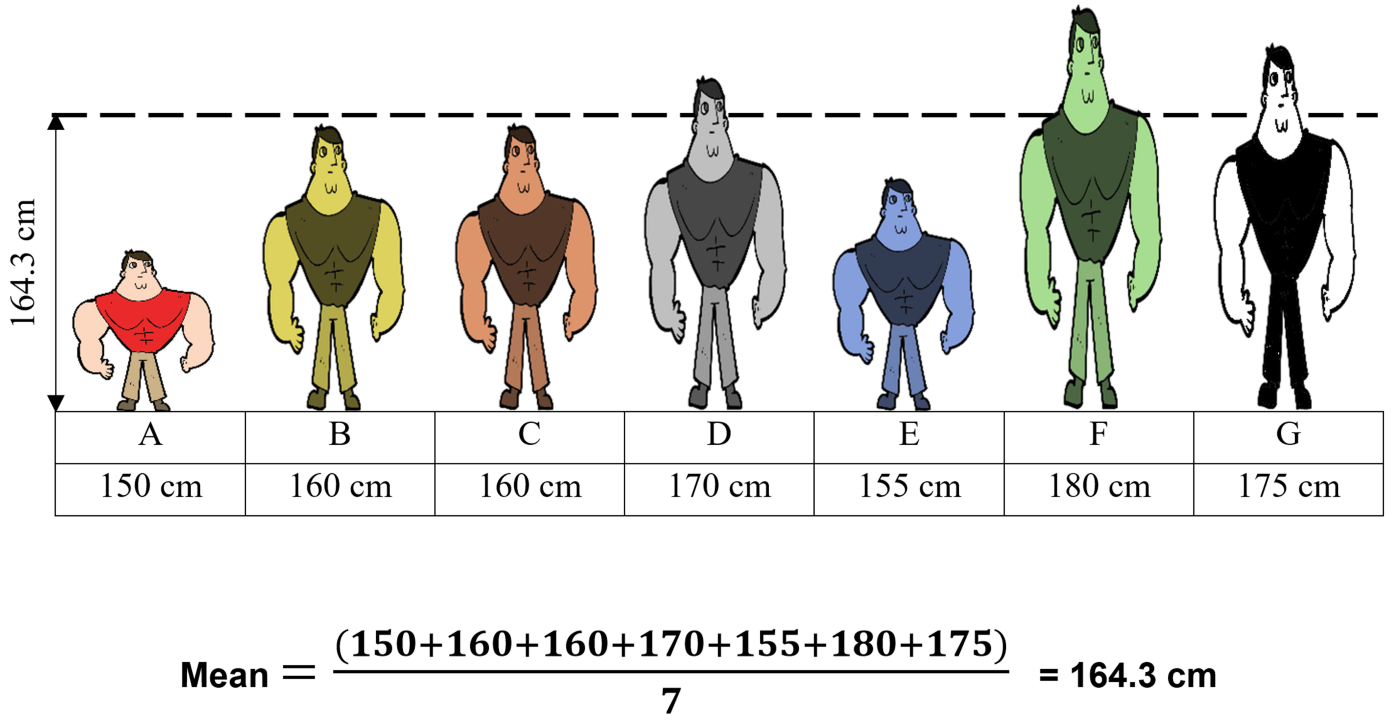

The mean is the arithmetic average, and it is probably the measure of central tendency that you are most familiar.

#### Why do we calculate mean?




The mean is used to summarize a data set. It is a measure of the center of a data set.


In [24]:
df.mean()

battery_power    1238.51850
blue                0.49500
clock_speed         1.52225
dual_sim            0.50950
fc                  4.30950
four_g              0.52150
int_memory         32.04650
m_dep               0.50175
mobile_wt         140.24900
n_cores             4.52050
pc                  9.91650
px_height         645.10800
px_width         1251.51550
ram              2124.21300
sc_h               12.30650
sc_w                5.76700
talk_time          11.01100
three_g             0.76150
touch_screen        0.50300
wifi                0.50700
price_range         1.50000
dtype: float64

#### We can also understand the mean using the below function. 

In [25]:
def mean_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    mean_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return mean_total_df

In [26]:
mean_cal(df, int64_lst)

normal_value  zero_value
0            19           0

In [27]:
mean_cal(df,float64_lst)

normal_value  zero_value
0             2           0

zero_value -> that the mean of a paticular column is zero, which isn't usefull in anyway and need to be drop.

# Null and Nan values

1. **Null Values**


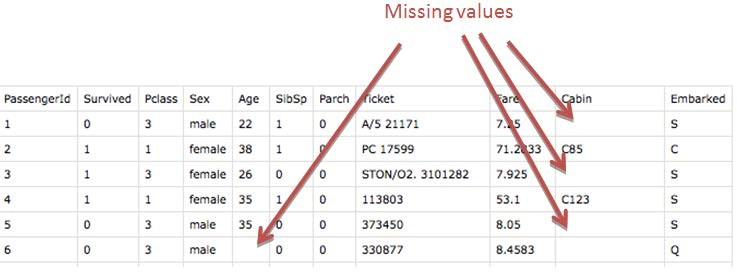

A null value in a relational database is used when the value in a column is unknown or missing. A null is neither an empty string (for character or datetime data types) nor a zero value (for numeric data types).

In [34]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

As we notice that there are no null values in our dataset.

2. **Nan Values**

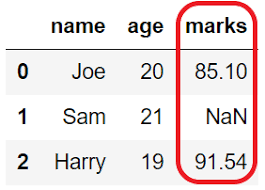

NaN, standing for Not a Number, is a member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable, especially in floating-point arithmetic.

In [35]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

As we notice that there are no nan values in our dataset.

#### Another way to remove null and nan values is to use the method "df.dropna(inplace=True)". 

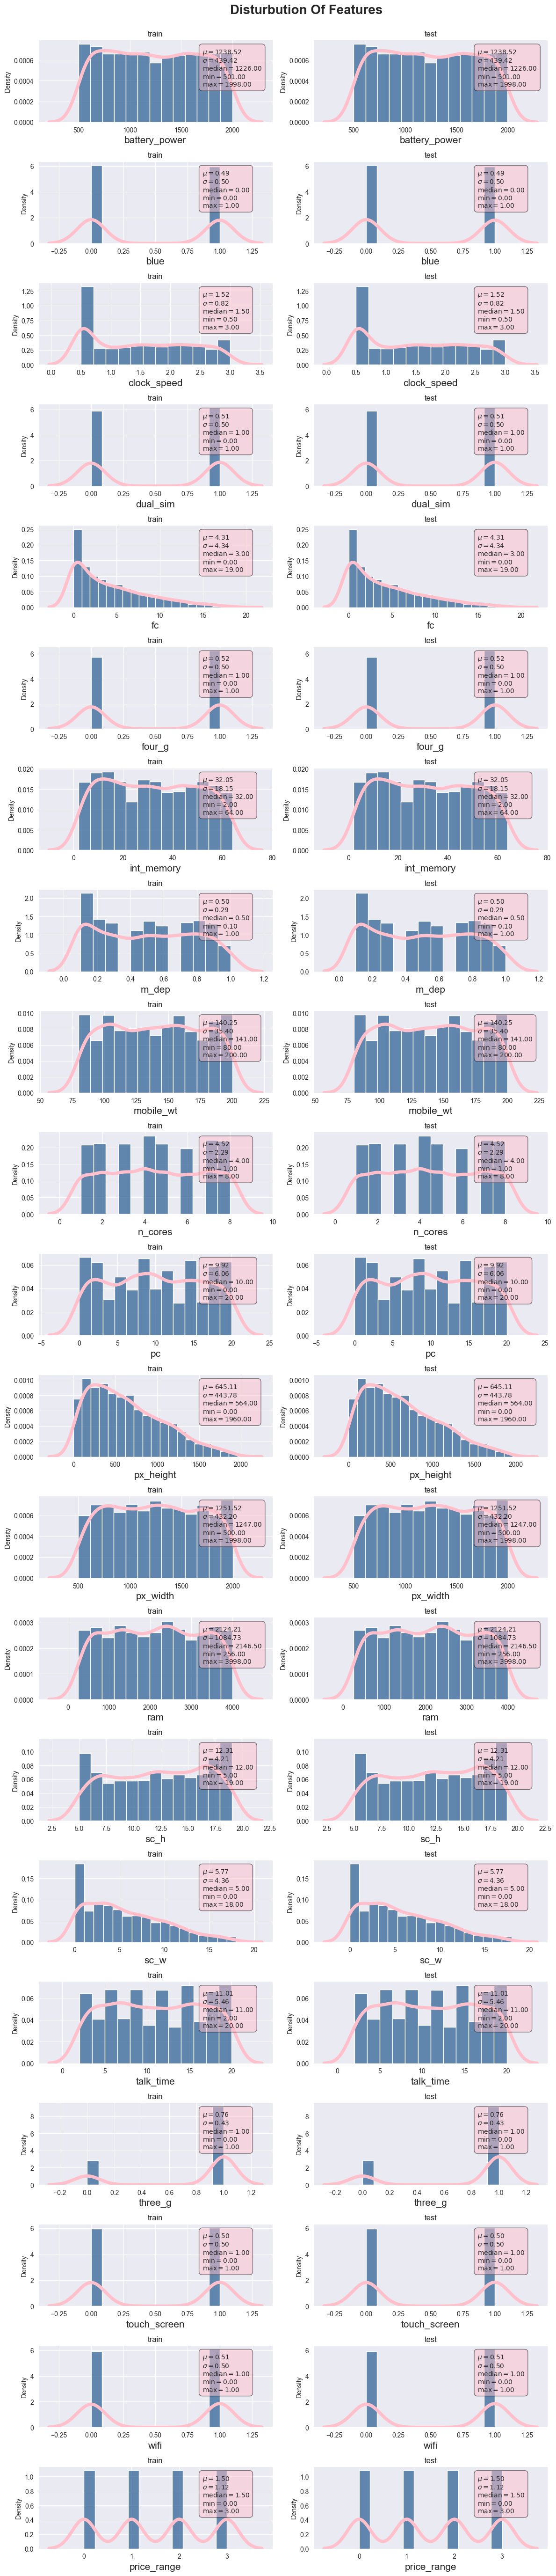

In [47]:
sns.set_style('darkgrid')
color = 'royalblue'

plt.figure(figsize = (12,55))
i = 0
for index, col in enumerate(list(df.columns.values)):
    i += 1 ;
    plt.subplot(21,2, index + i)
    ax = sns.histplot(x = col, data = df, color = "#326598", stat = "density", common_norm=False)
    sns.kdeplot(x = col, data = df, color = "pink", linewidth = 5)
    plt.xlabel(col, size = 15)
    plt.title('train')
    # set text on axes
    textstr_train = '\n'.join((
    r'$\mu=%.2f$' %df[col].mean(),
    r'$\sigma=%.2f$' %df[col].std(),
    r'$\mathrm{median}=%0.2f$' %np.median(df[col]),
    r'$\mathrm{min}=%.2f$' %df[col].min(),
    r'$\mathrm{max}=%.2f$' %df[col].max()
    ))
    ax.text(0.7, 0.90, textstr_train, transform=ax.transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='pink', edgecolor='black', pad=0.5, alpha = 0.5))
    
    plt.subplot(21,2, index + (i+1))
    ax = sns.histplot(x = col, data = df, color = "#326598", stat = "density", common_norm=False)
    sns.kdeplot(x = col, data = df, color = "pink", linewidth = 5)
    plt.xlabel(col, size = 15)
    plt.title('test')
    
    textstr_test = '\n'.join((
    r'$\mu=%.2f$' %df[col].mean(),
    r'$\sigma=%.2f$' %df[col].std(),
    r'$\mathrm{median}=%0.2f$' %np.median(df[col]),
    r'$\mathrm{min}=%.2f$' %df[col].min(),
    r'$\mathrm{max}=%.2f$' %df[col].max()
    ))
    ax.text(0.7, 0.90, textstr_test, transform=ax.transAxes, fontsize=10, verticalalignment='top',bbox=dict(boxstyle='round',facecolor='pink', edgecolor='black', pad=0.5, alpha = 0.5))
    plt.grid()

plt.suptitle("Disturbution Of Features", y = 1, x = 0.55, size = 20,fontweight = "bold")
plt.tight_layout()
plt.show()

# Count of unique occurences of every value in all categorical value



In [36]:
for value in objects_lst:
    
    print(f"{value:{10}} {df[value].value_counts()}")

- Categorical data are variables that contain label values rather than numeric values.The number of possible values is often limited to a fixed set.




There is no categorical variable so no need to do encoding.

# Skewness 

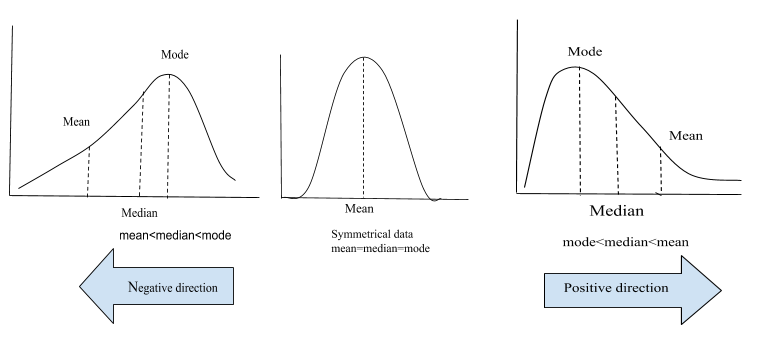

Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness

#### Why do we calculate Skewness ?

Skewness gives the direction of the outliers if it is right-skewed, most of the outliers are present on the right side of the distribution while if it is left-skewed, most of the outliers will present on the left side of the distribution

#### Below is the function to calculate skewness. 

In [37]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in float64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [38]:
float64_cols = ['float64']
float64_lst_col = list(df.select_dtypes(include=float64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, float64_lst_col)

In [39]:
skew_df

column  skewness_value  skewness (+ve or -ve)
0  clock_speed          0.1781  positive (+ve) skewed
1        m_dep          0.0891  positive (+ve) skewed

In [40]:
skew_total_df

positive (+ve) skewed  normal distrbution  negative (-ve) skewed
0                      2                   0                      0

In [41]:
columns = df.columns.tolist()
for i in columns:
    print(df[i].skew())

0.03189847179278164
0.020016015215014945
0.1780841202790887
-0.03803539334775485
1.0198114105315519
-0.08614423907054716
0.05788932785206039
0.08908200979245855
0.006558157428692449
0.0036275083137803994
0.017306150471392553
0.6662712560691598
0.014787473768006081
0.006628035398750348
-0.09888424098283438
0.6337870734456067
0.009511762221541457
-1.2281416344153246
-0.012009224801531652
-0.028023766608637157
0.0


We notice with the above results that we have following details:
1. 15 columns are positive skewed
2. 5 columns are negative skewed



### Step 3 Insights: - 

With the statistical analysis we have found that the data have a lot of skewness in them all the columns are positively skewed with mostly zero variance.

Statistical analysis is little difficult to understand at one glance so to make it more understandable we will perform visulatization on the data which will help us to understand the process easily.

### Why we are calculating all these metrics? 

Mean / Median /Mode/ Variance /Standard Deviation are all very basic but very important concept of statistics used in data science. Almost all the machine learning algorithm uses these concepts in data preprocessing steps. These concepts are part of descriptive statistics where we basically used to describe and understand the data for features in Machine learning

# Step 4: Data Exploration

In [48]:
num_columns=['battery_power','clock_speed', 'fc', 'int_memory','m_dep','mobile_wt','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']
cat_columns=['blue','dual_sim','four_g','n_cores', 'three_g','touch_screen','wifi']

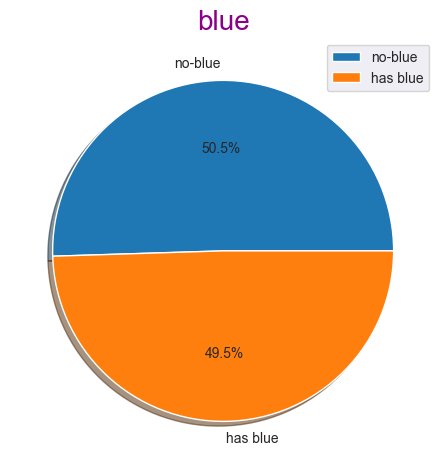

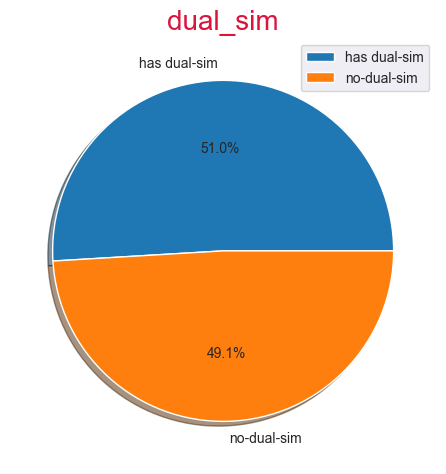

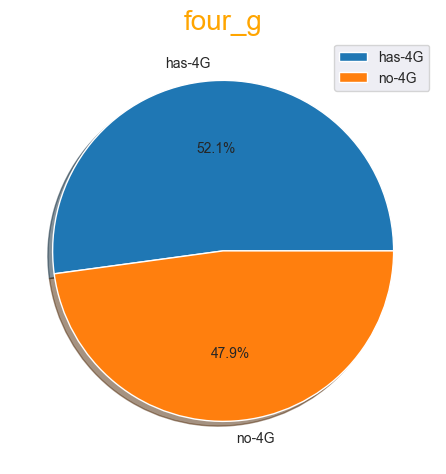

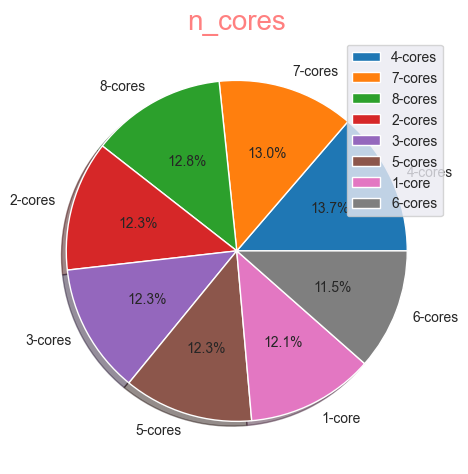

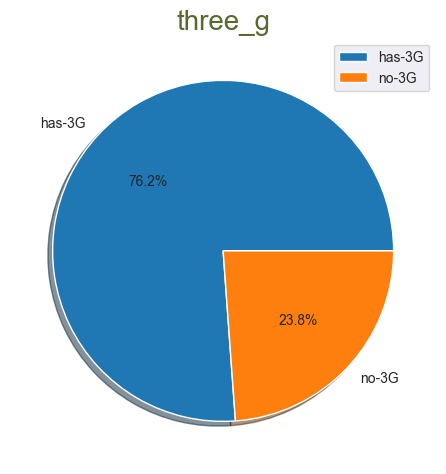

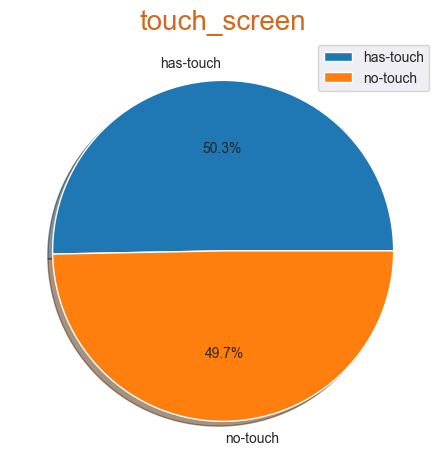

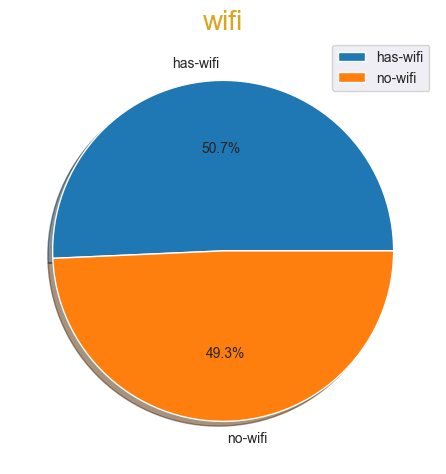

In [53]:
colors_cat=['#8B008B','#DC143C','#FFA500','#ff8080','#556B2F','#D2691E','#DAA520']
new_train=df.replace(to_replace={'blue':[0,1],'dual_sim':[0,1],'four_g':[0,1],
                      'n_cores':[1,2,3,4,5,6,7,8],'three_g':[0,1],'touch_screen':[0,1],'wifi':[0,1]},
           value={'blue':['no-blue','has blue'],
                  'dual_sim':['no-dual-sim','has dual-sim'],
                 'four_g':['no-4G','has-4G'],
                 'n_cores':['1-core','2-cores','3-cores','4-cores','5-cores','6-cores','7-cores','8-cores'],
                 'three_g':['no-3G','has-3G'],
                 'touch_screen':['no-touch','has-touch'],
                 'wifi':['no-wifi','has-wifi']})
for i,c in enumerate(cat_columns):
    plt.figure(figsize =(5.5, 6.5))
    plt.pie(new_train[c].value_counts() ,labels=list(new_train[c].value_counts().index),shadow = True,autopct='%1.1f%%')
    plt.legend()
    plt.title(c,color=colors_cat[i],fontsize=20)


### Insights:-
- The number of phones that use Bluetooth is very close to the number of phone whom do not use it
- Also, the number of phones with two SIM cards is very close to the number of single SIM phones
- The number of phones with 4G is slightly more than the number of phones without 4G
- The number of phones with different types of number of cores have an almost equal distribution
- The number of touch screen and Wi-Fi have the same distribution as above
- But The number of phones that use 3G is much more than the number of phones that do not use it

In [54]:
import matplotlib.ticker as mtick

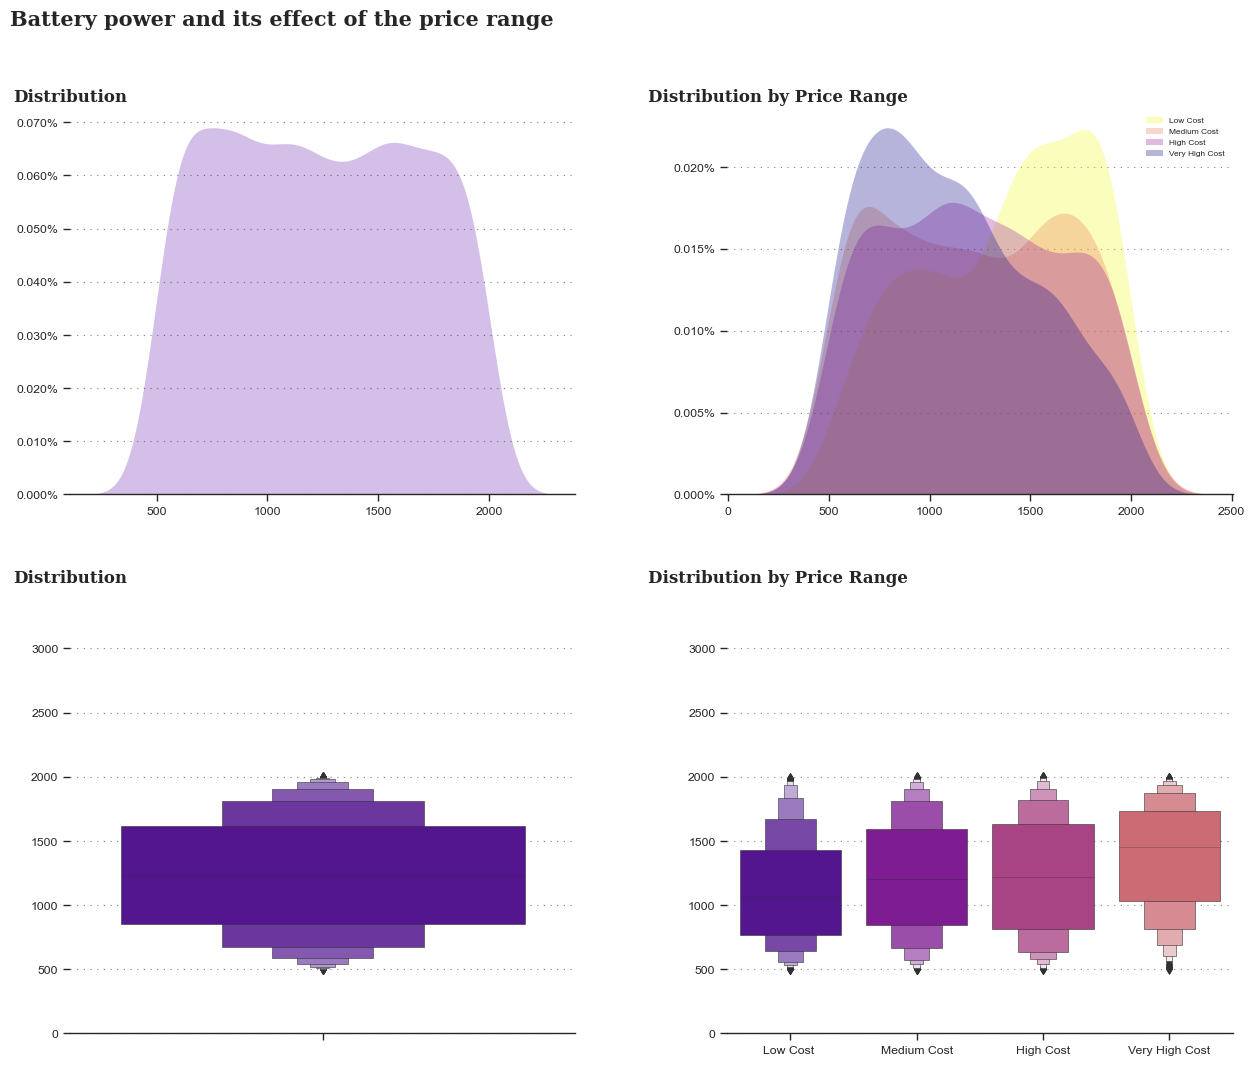

In [56]:
sns.set(rc={"figure.dpi":100})
sns.set_context('paper')
sns.set_style("ticks")

fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Battery power and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0],ylim=(0, 3000),xlim=(0,5))
ax3 = fig.add_subplot(gs[1,1],ylim=(0, 3000))

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='battery_power',
            data=df,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='battery_power',
           hue='price_range',
           shade=True,
           data=df,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))
sns.boxenplot(y='battery_power',
              data=df,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y', dashes=(1,5))
sns.boxenplot(x='price_range',
              y='battery_power',
              data=df,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

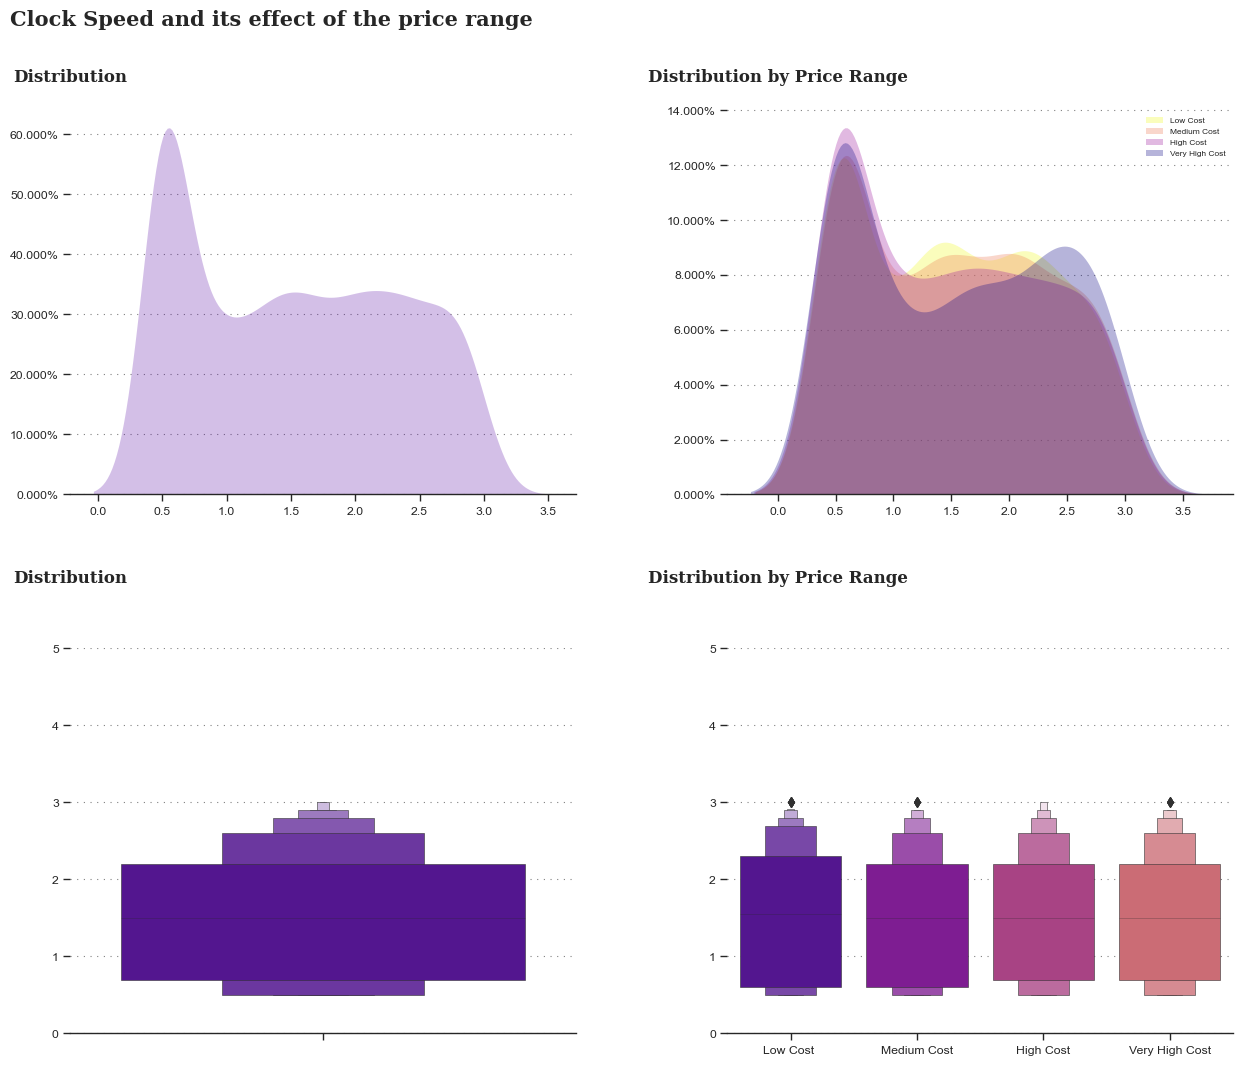

In [57]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Clock Speed and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0],ylim=(0,5))
ax3 = fig.add_subplot(gs[1,1],ylim=(0,5))

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='clock_speed',
            data=df,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='clock_speed',
           hue='price_range',
           shade=True,
           data=df,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))
sns.boxenplot(y='clock_speed',
              data=df,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y',  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='clock_speed',
              data=df,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

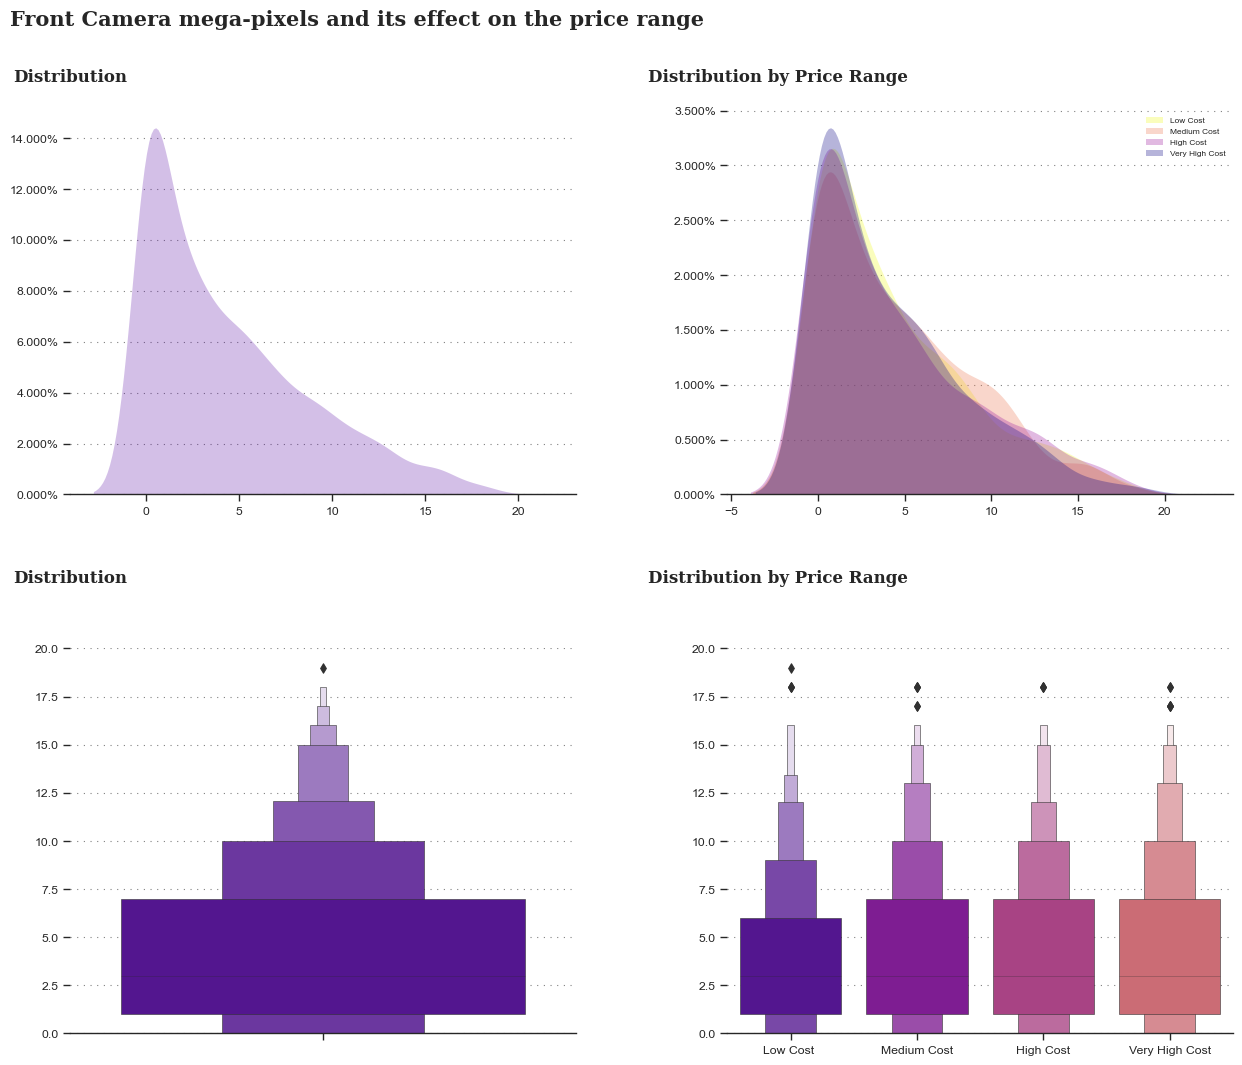

In [58]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Front Camera mega-pixels and its effect on the price range', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0],ylim=(0,20))
ax3 = fig.add_subplot(gs[1,1],ylim=(0,20))

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='fc',
            data=df,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='fc',
           hue='price_range',
           shade=True,
           data=df,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))
sns.boxenplot(y='fc',
              data=df,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y',  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='fc',
              data=df,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

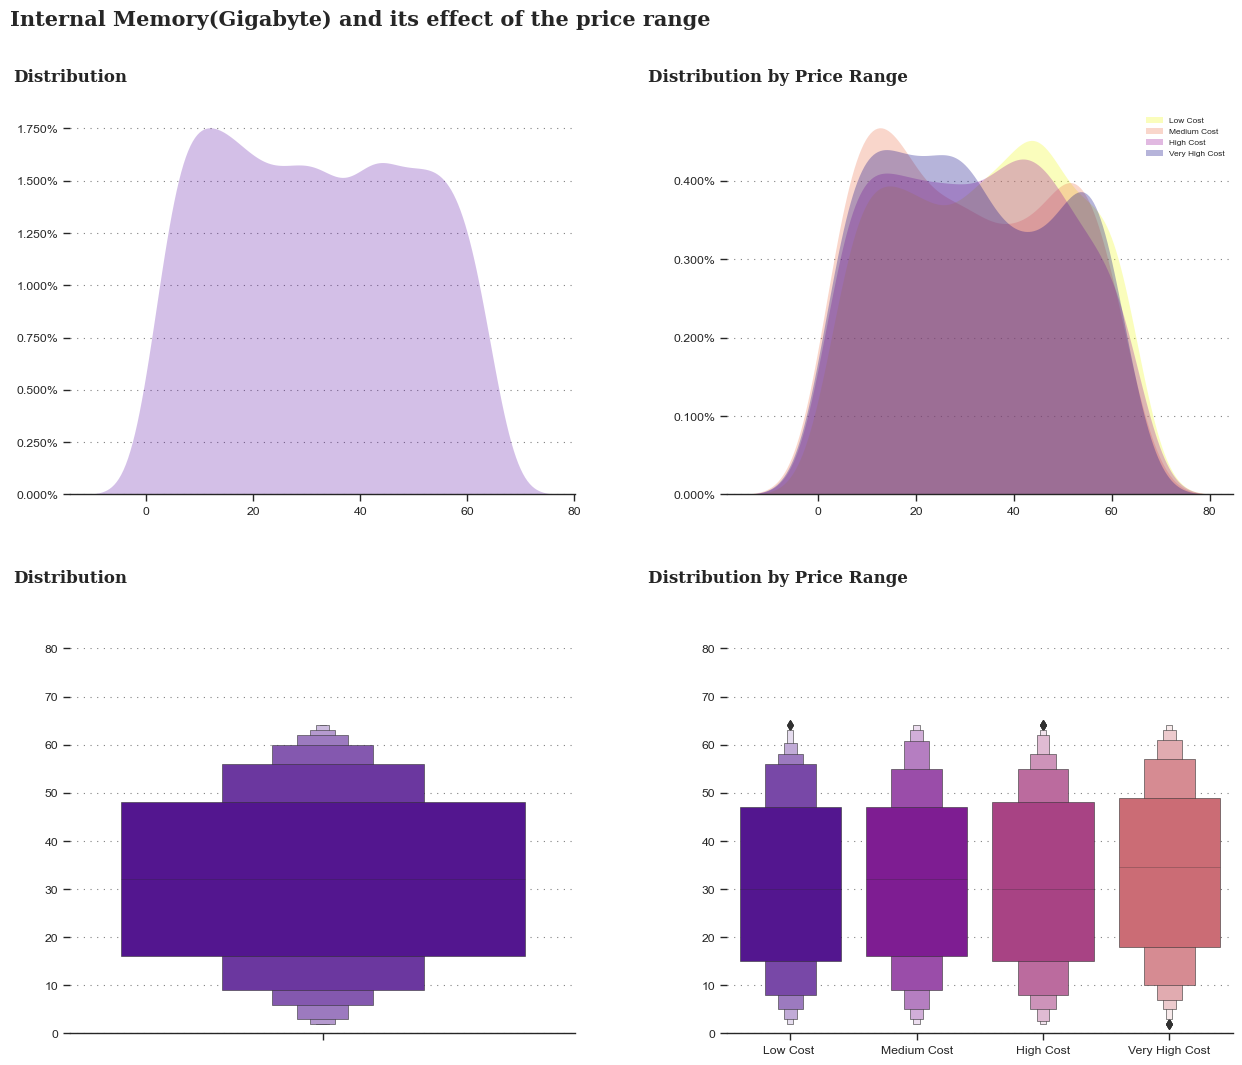

In [59]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Internal Memory(Gigabyte) and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0],ylim=(0,80))
ax3 = fig.add_subplot(gs[1,1],ylim=(0,80))

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='int_memory',
            data=df,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='int_memory',
           hue='price_range',
           shade=True,
           data=df,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))
sns.boxenplot(y='int_memory',
              data=df,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y',  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='int_memory',
              data=df,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

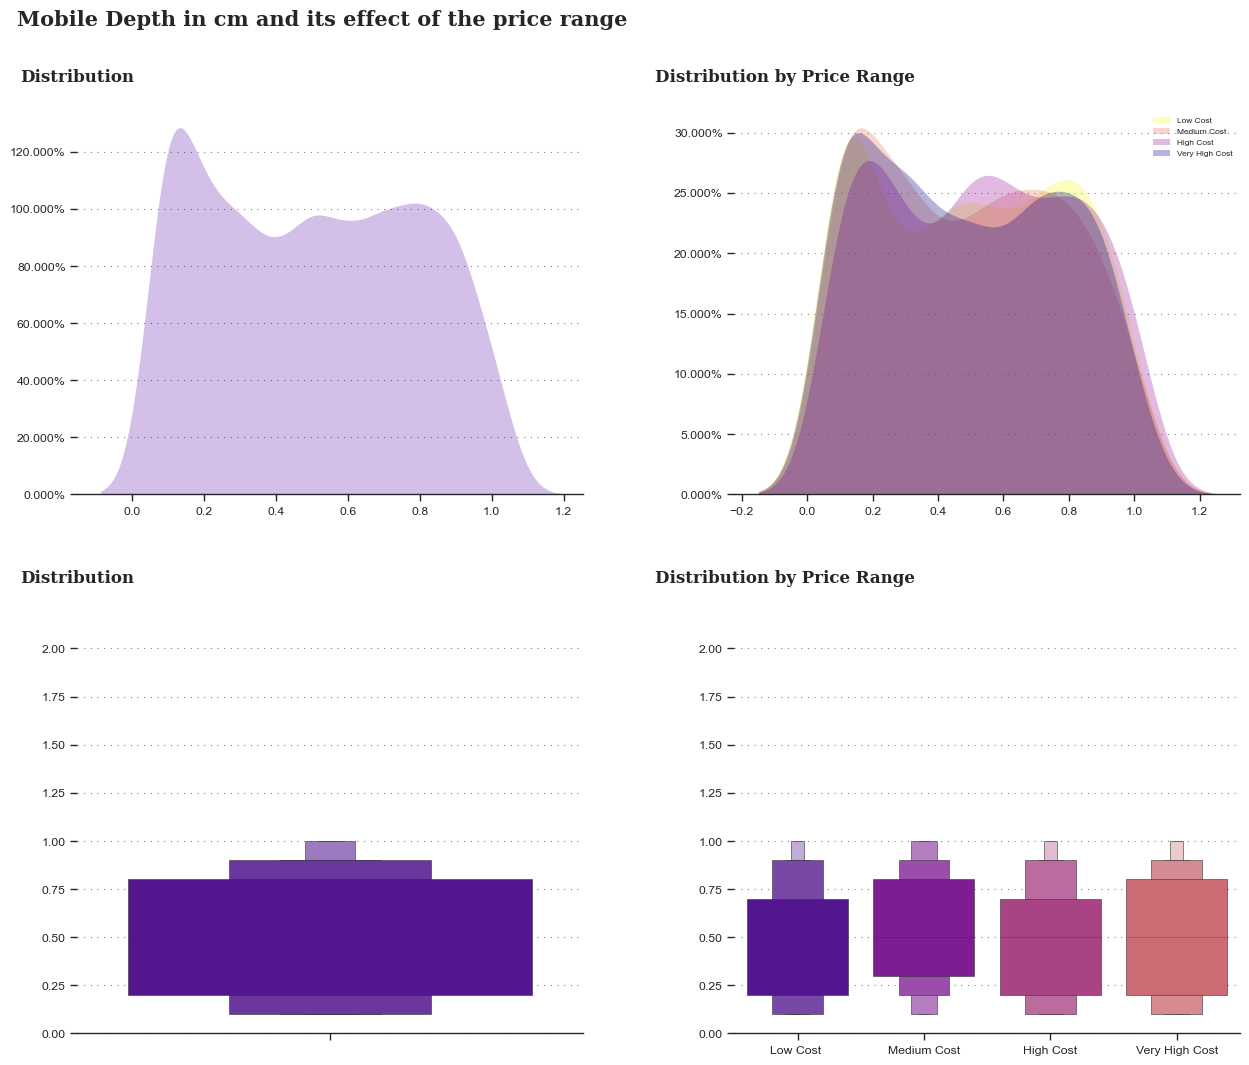

In [60]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Mobile Depth in cm and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0],ylim=(0,2))
ax3 = fig.add_subplot(gs[1,1],ylim=(0,2))

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='m_dep',
            data=df,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='m_dep',
           hue='price_range',
           shade=True,
           data=df,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))
sns.boxenplot(y='m_dep',
              data=df,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y',  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='m_dep',
              data=df,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

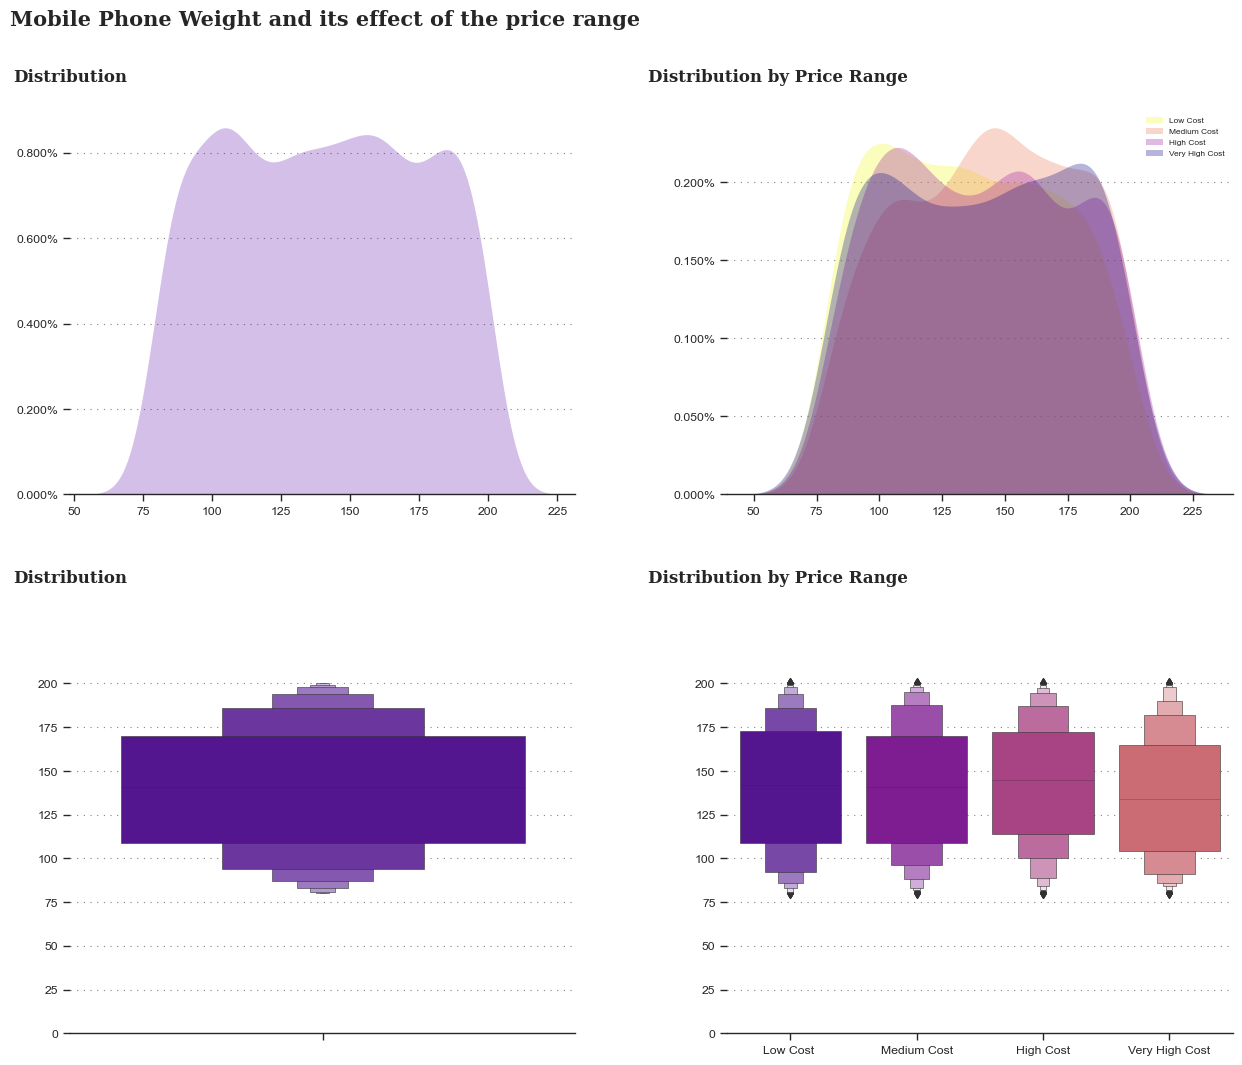

In [61]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Mobile Phone Weight and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0],ylim=(0,220))
ax3 = fig.add_subplot(gs[1,1],ylim=(0,220))

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='mobile_wt',
            data=df,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='mobile_wt',
           hue='price_range',
           shade=True,
           data=df,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))
sns.boxenplot(y='mobile_wt',
              data=df,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y', dashes=(1,5))
sns.boxenplot(x='price_range',
              y='mobile_wt',
              data=df,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

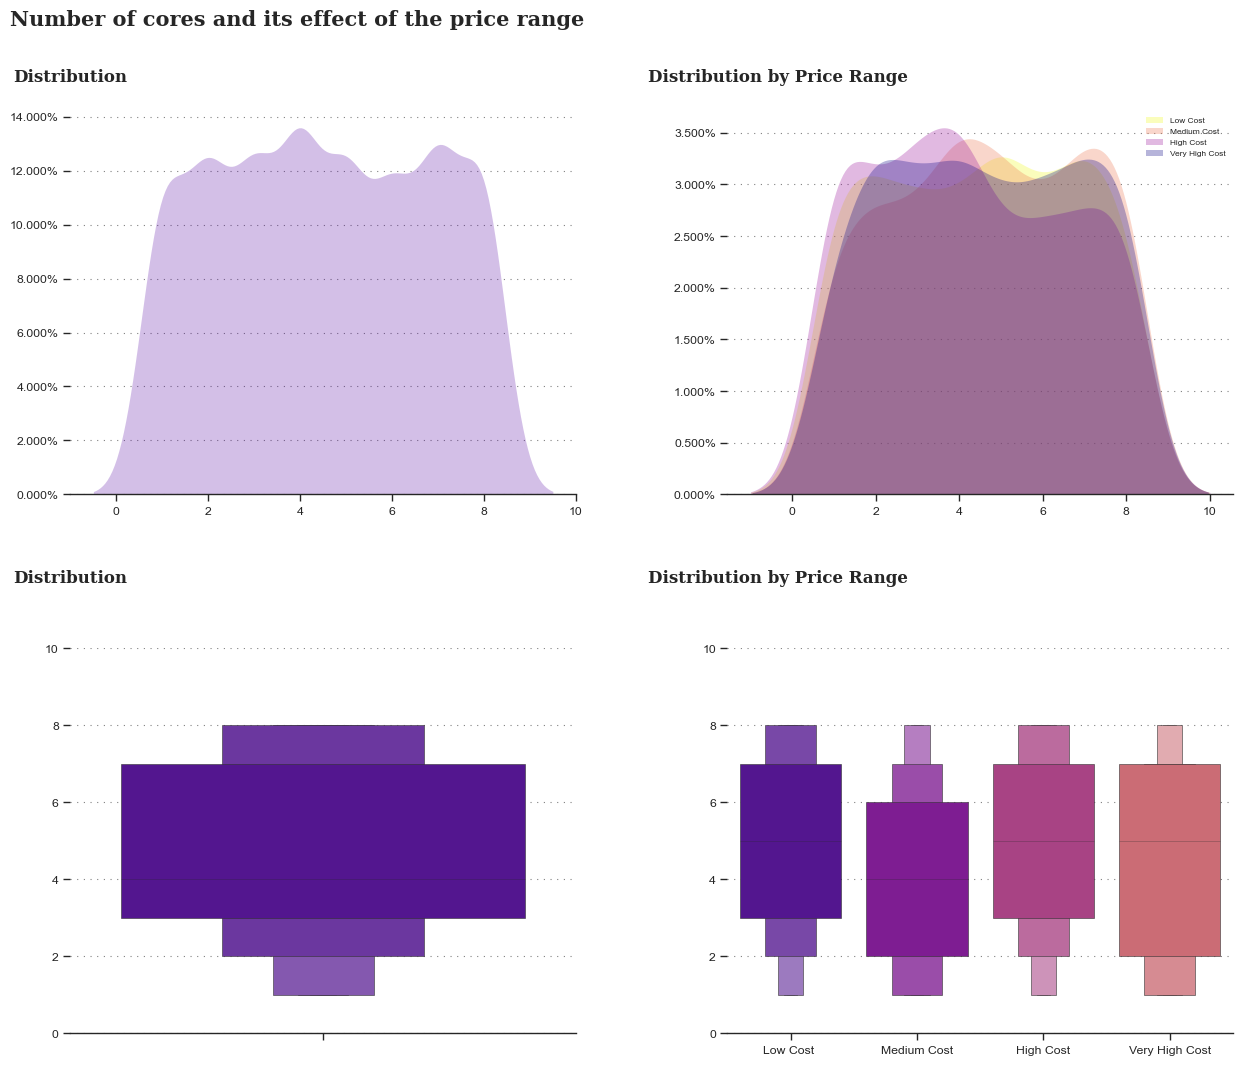

In [62]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Number of cores and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0],ylim=(0,10))
ax3 = fig.add_subplot(gs[1,1],ylim=(0,10))

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='n_cores',
            data=df,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='n_cores',
           hue='price_range',
           shade=True,
           data=df,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))
sns.boxenplot(y='n_cores',
              data=df,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y', dashes=(1,5))
sns.boxenplot(x='price_range',
              y='n_cores',
              data=df,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

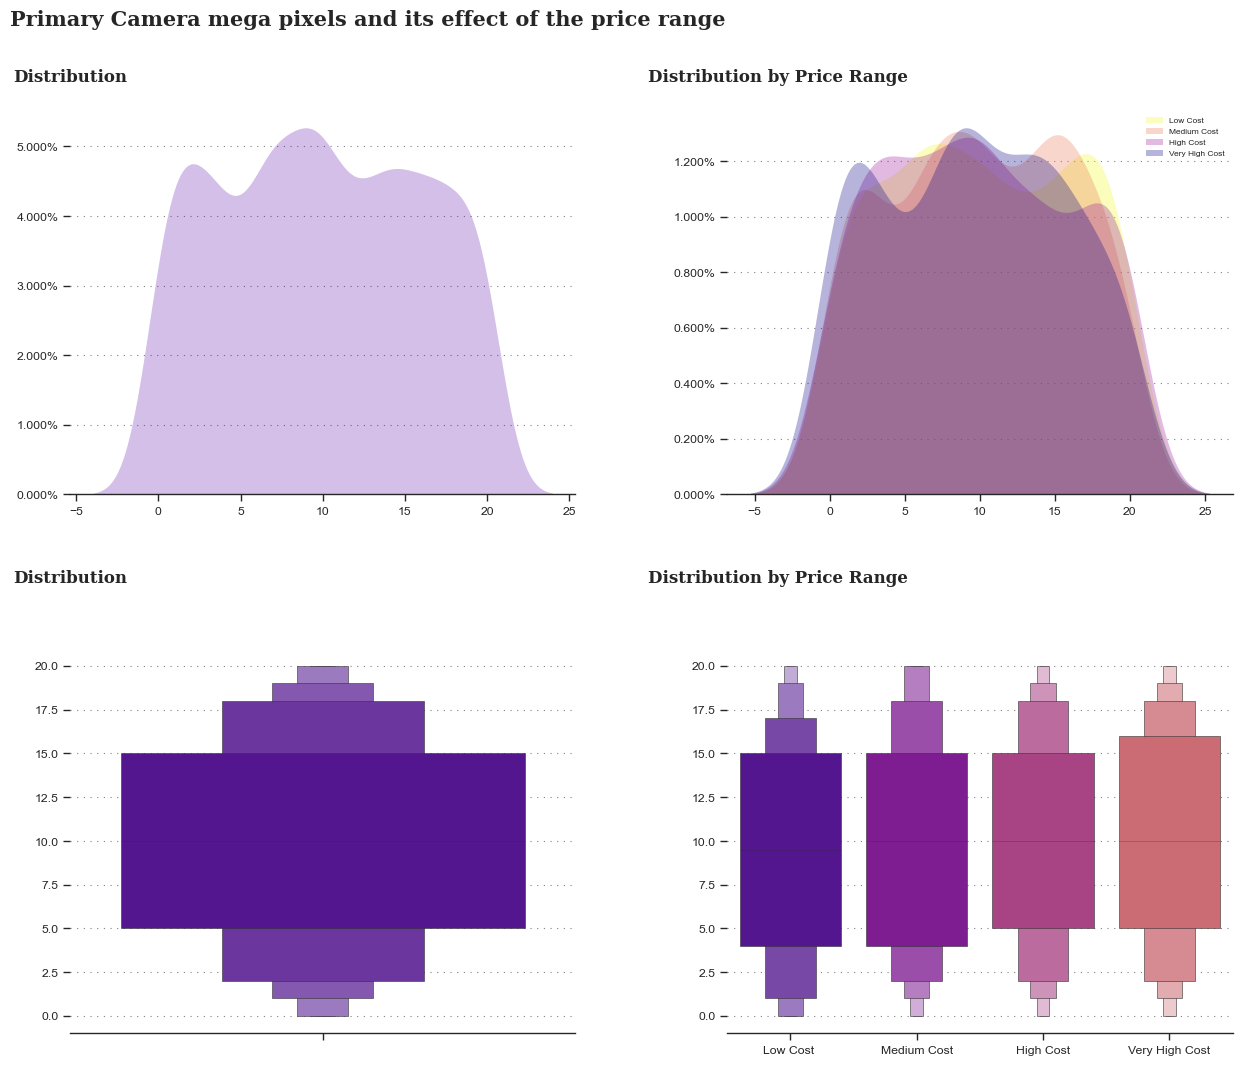

In [63]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Primary Camera mega pixels and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='pc',
            data=df,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='pc',
           hue='price_range',
           shade=True,
           data=df,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))
sns.boxenplot(y='pc',
              data=df,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y',  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='pc',
              data=df,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

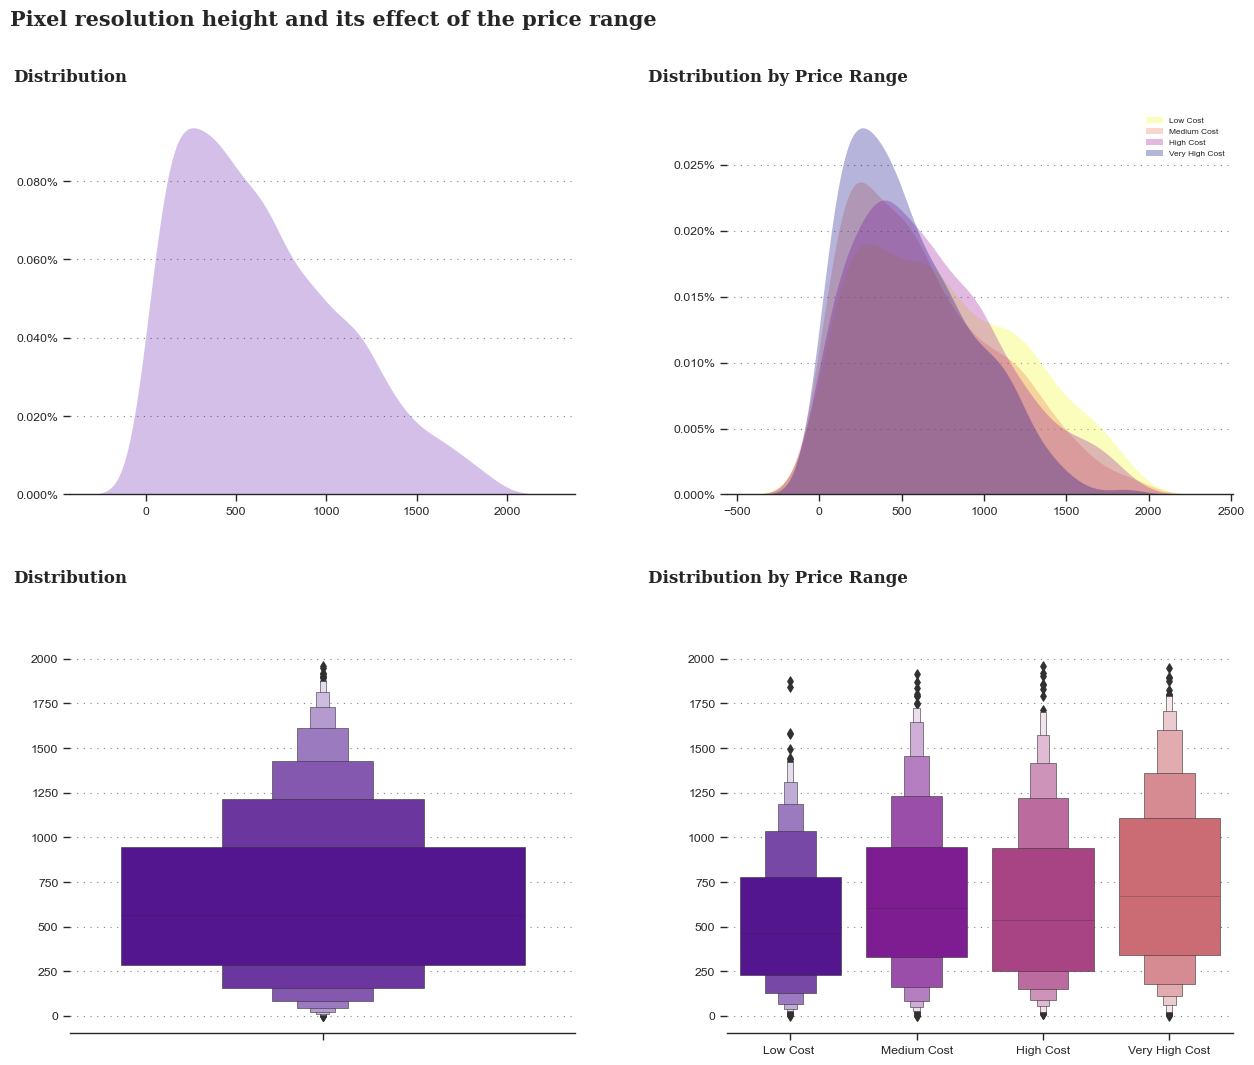

In [64]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Pixel resolution height and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='px_height',
            data=df,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='px_height',
           hue='price_range',
           shade=True,
           data=df,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))
sns.boxenplot(y='px_height',
              data=df,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y',  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='px_height',
              data=df,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

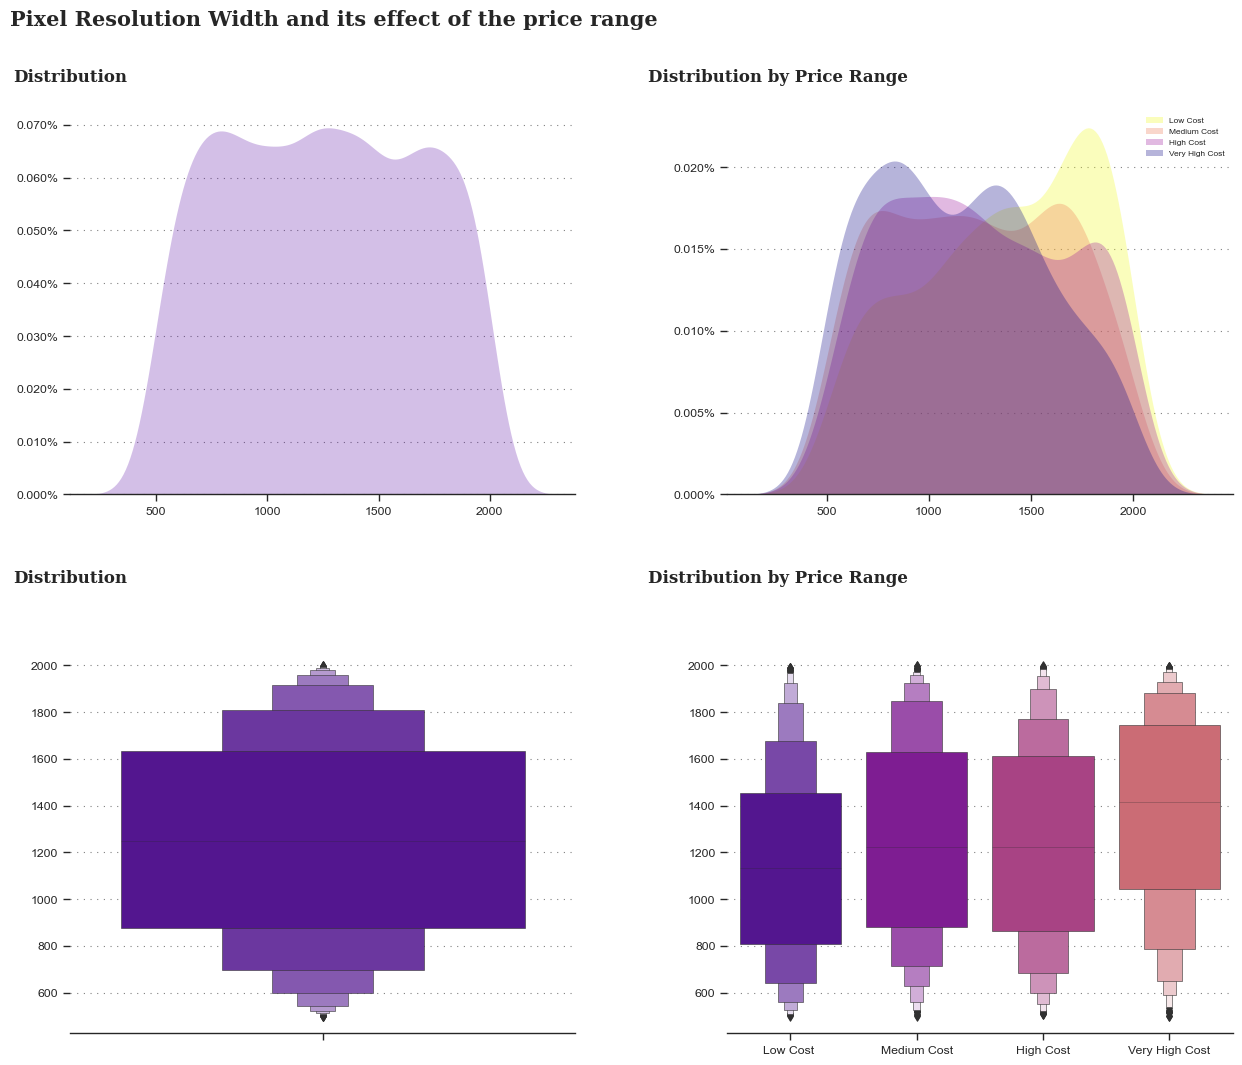

In [65]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Pixel Resolution Width and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='px_width',
            data=df,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='px_width',
           hue='price_range',
           shade=True,
           data=df,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y', dashes=(1,5))
sns.boxenplot(y='px_width',
              data=df,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y',  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='px_width',
              data=df,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

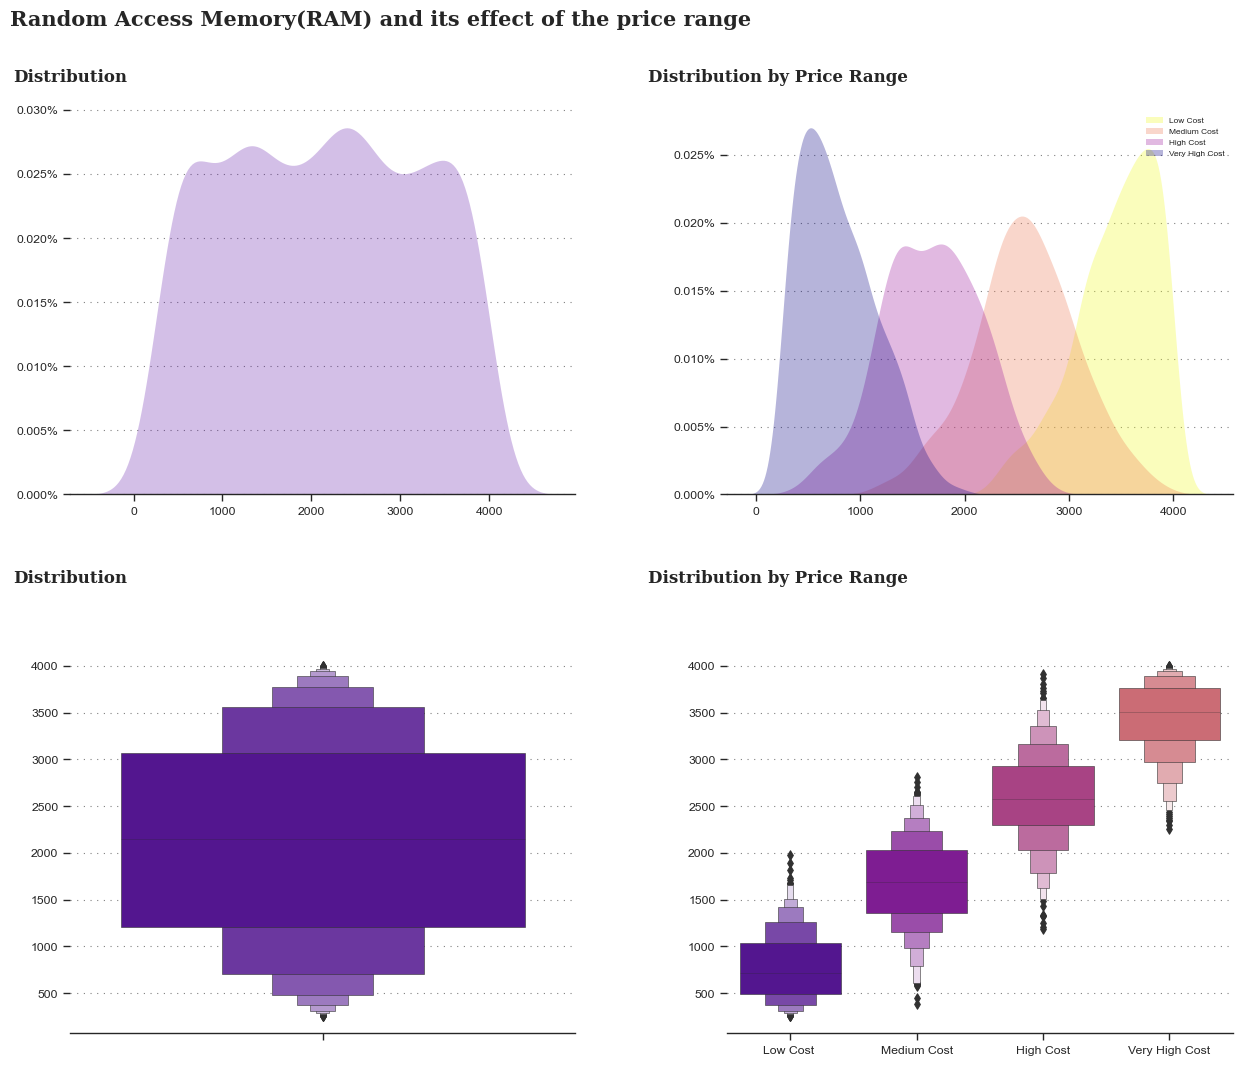

In [66]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Random Access Memory(RAM) and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='ram',
            data=df,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='ram',
           hue='price_range',
           shade=True,
           data=df,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))
sns.boxenplot(y='ram',
              data=df,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y',  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='ram',
              data=df,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

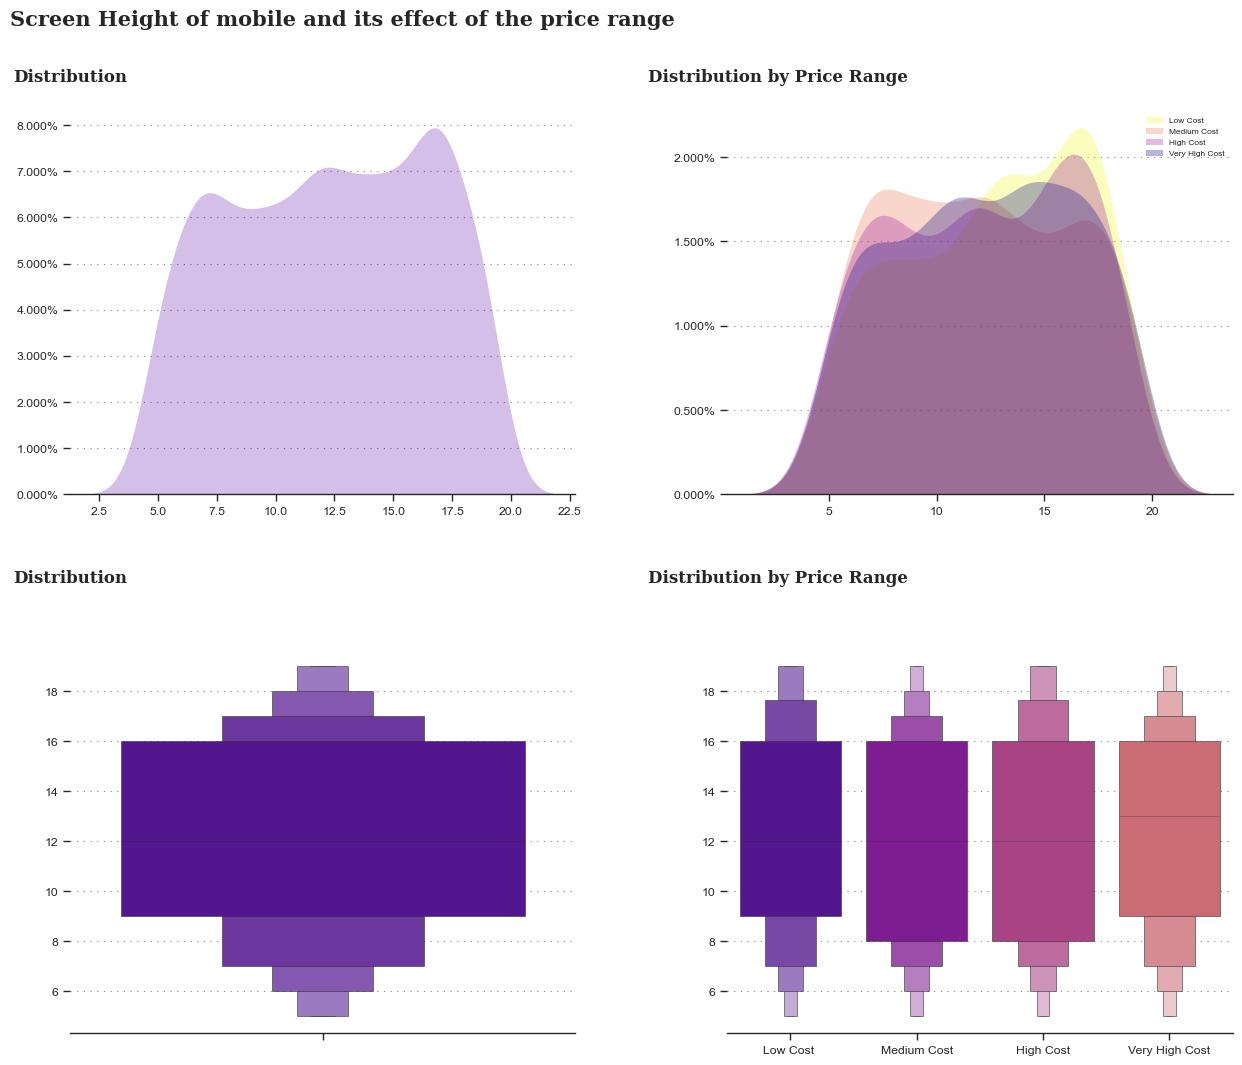

In [67]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Screen Height of mobile and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='sc_h',
            data=df,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='sc_h',
           hue='price_range',
           shade=True,
           data=df,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))
sns.boxenplot(y='sc_h',
              data=df,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y',  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='sc_h',
              data=df,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

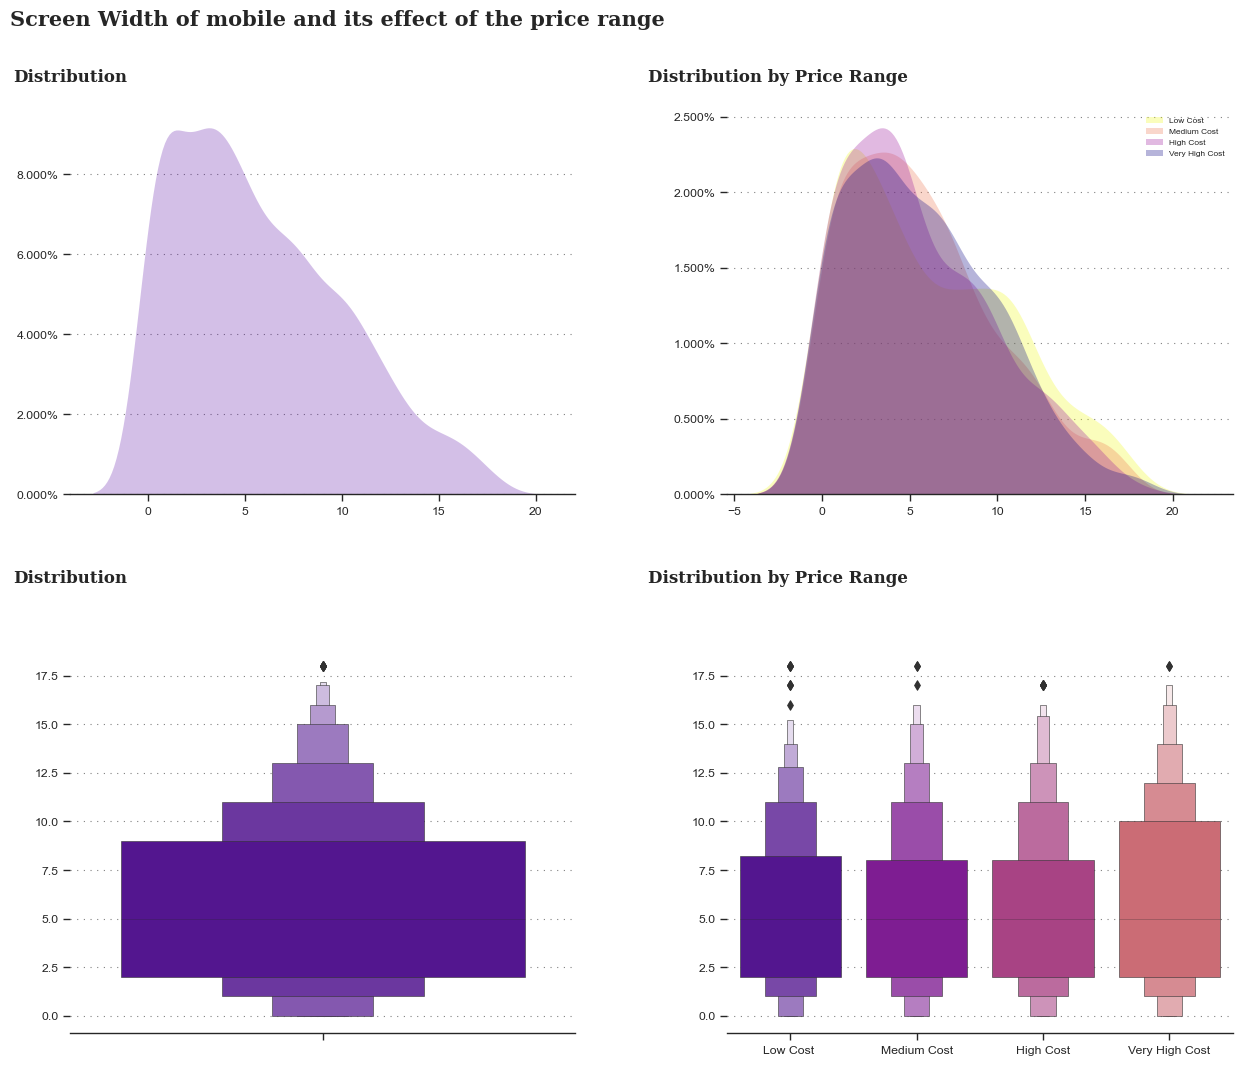

In [68]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Screen Width of mobile and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='sc_w',
            data=df,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='sc_w',
           hue='price_range',
           shade=True,
           data=df,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))
sns.boxenplot(y='sc_w',
              data=df,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y',  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='sc_w',
              data=df,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

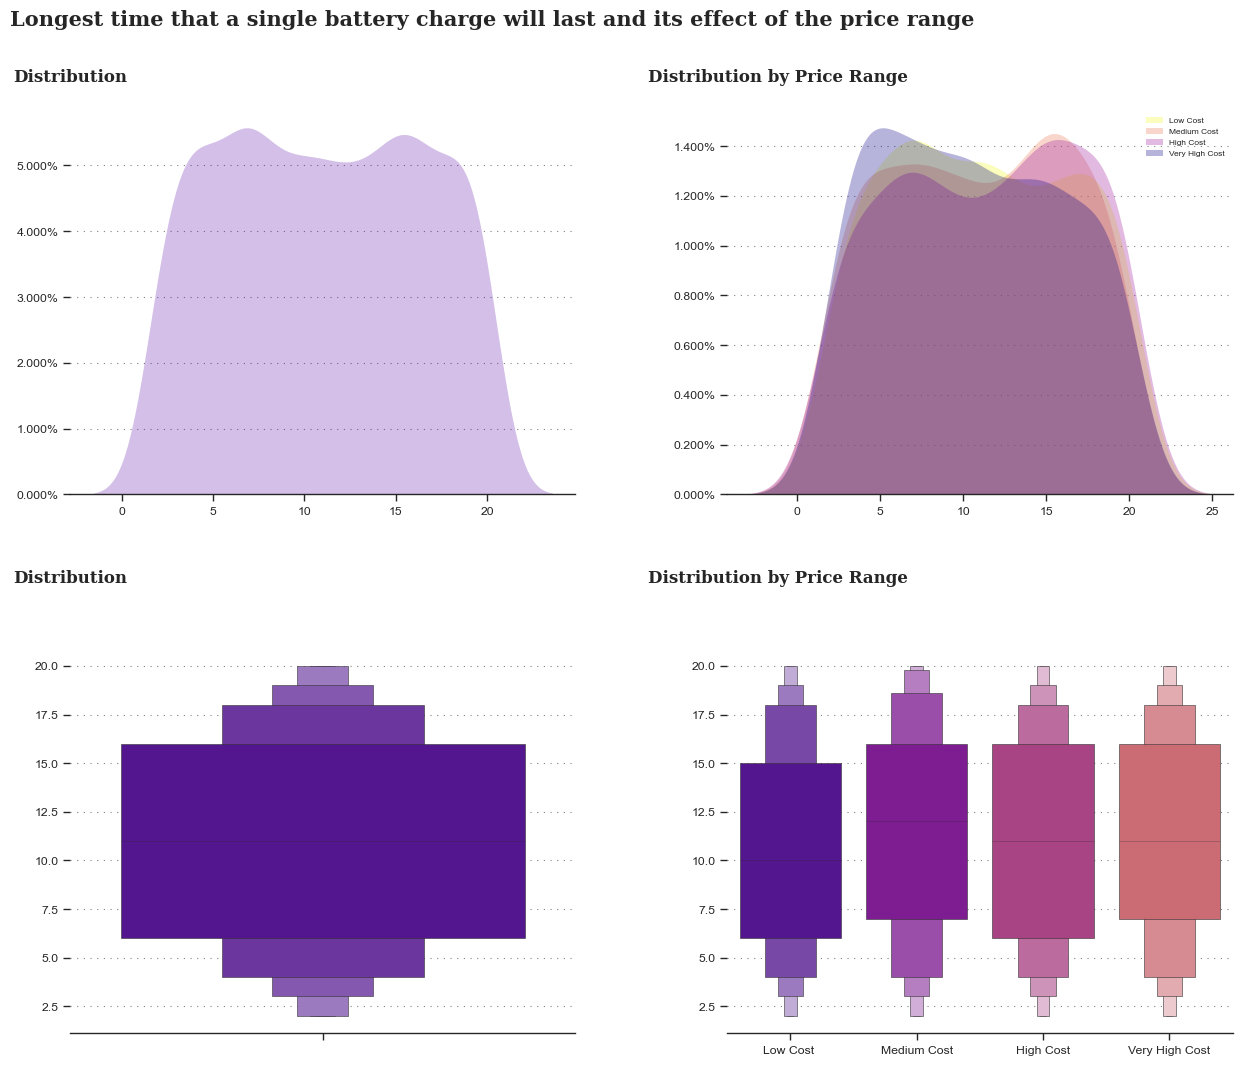

In [70]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Longest time that a single battery charge will last and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='talk_time',
            data=df,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='talk_time',
           hue='price_range',
           shade=True,
           data=df,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))
sns.boxenplot(y='talk_time',
              data=df,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y',  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='talk_time',
              data=df,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

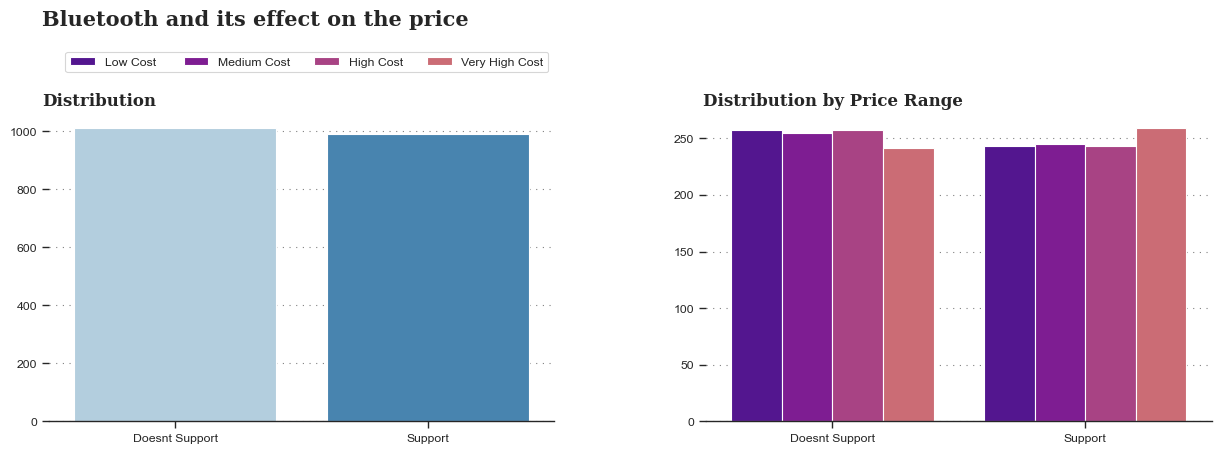

In [71]:
fig = plt.figure(figsize=(15,4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120,1.1,'Bluetooth and its effect on the price ', fontfamily='serif',fontsize=15, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


sns.countplot(x='blue',
           data=df,
            palette='Blues',
           ax=ax0)

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Doesnt Support","Support"])
ax0.set_xlabel("")
ax0.set_ylabel("")   

sns.countplot(x='blue',
             data=df,
             hue='price_range',
             ax=ax1)

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.25,y=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_legend().remove()
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Low Cost ', 'Medium Cost','High Cost','Very High Cost'], ncol=4, bbox_to_anchor=(-0.30, 1.22))
ax1.set_xticklabels(["Doesnt Support","Support"])
ax1.set_xlabel("")
ax1.set_ylabel("")

fig.show()

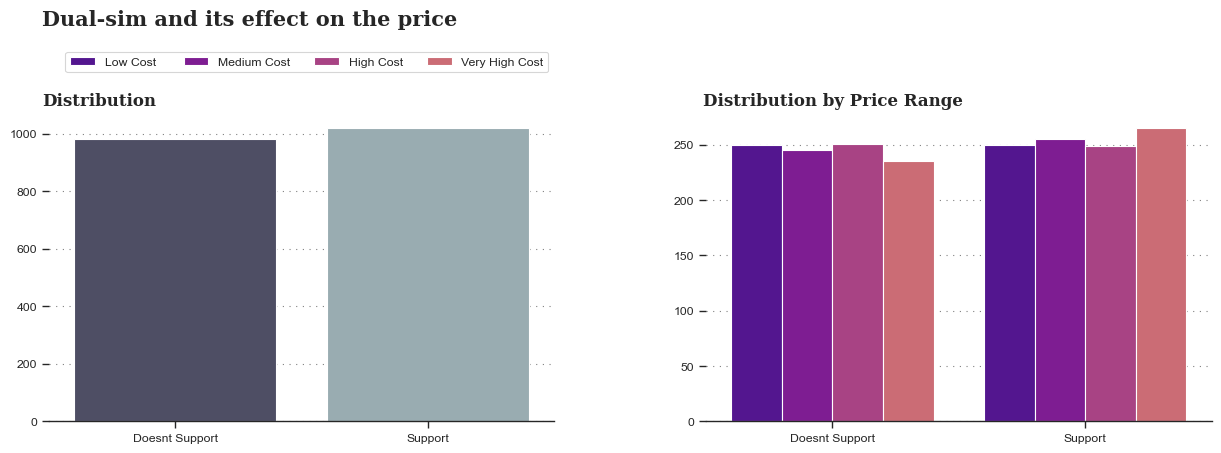

In [72]:
fig = plt.figure(figsize=(15,4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120,1.1,'Dual-sim and its effect on the price ', fontfamily='serif',fontsize=15, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


sns.countplot(x='dual_sim',
           data=df,
            palette='bone',
           ax=ax0)
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Doesnt Support","Support"])
ax0.set_xlabel("")
ax0.set_ylabel("")   

sns.countplot(x='dual_sim',
             data=df,
             hue='price_range',
             ax=ax1)
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.25,y=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_legend().remove()
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Low Cost ', 'Medium Cost','High Cost','Very High Cost'], ncol=4, bbox_to_anchor=(-0.30, 1.22))
ax1.set_xticklabels(["Doesnt Support","Support"])
ax1.set_xlabel("")
ax1.set_ylabel("")

fig.show()

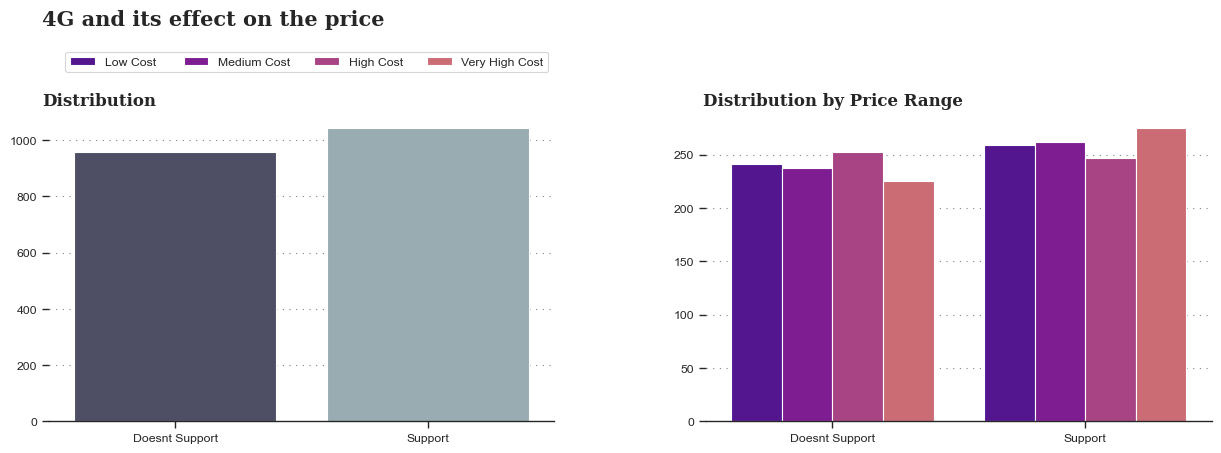

In [73]:
fig = plt.figure(figsize=(15,4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120,1.1,'4G and its effect on the price ', fontfamily='serif',fontsize=15, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


sns.countplot(x='four_g',
           data=df,
            palette='bone',
           ax=ax0)
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Doesnt Support","Support"])
ax0.set_xlabel("")
ax0.set_ylabel("")   

sns.countplot(x='four_g',
             data=df,
             hue='price_range',
             ax=ax1)
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.25,y=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_legend().remove()
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Low Cost ', 'Medium Cost','High Cost','Very High Cost'], ncol=4, bbox_to_anchor=(-0.30, 1.22))
ax1.set_xticklabels(["Doesnt Support","Support"])
ax1.set_xlabel("")
ax1.set_ylabel("")

fig.show()

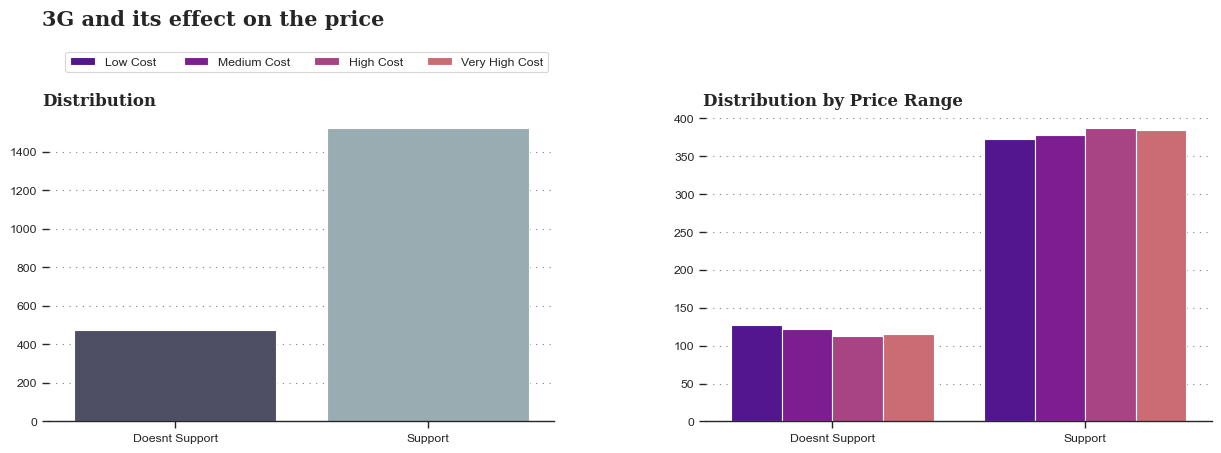

In [74]:
fig = plt.figure(figsize=(15,4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120,1.1,'3G and its effect on the price ', fontfamily='serif',fontsize=15, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


sns.countplot(x='three_g',
           data=df,
            palette='bone',
           ax=ax0)
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Doesnt Support","Support"])
ax0.set_xlabel("")
ax0.set_ylabel("")   

sns.countplot(x='three_g',
             data=df,
             hue='price_range',
             ax=ax1)
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.25,y=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_legend().remove()
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Low Cost ', 'Medium Cost','High Cost','Very High Cost'], ncol=4, bbox_to_anchor=(-0.30, 1.22))
ax1.set_xticklabels(["Doesnt Support","Support"])
ax1.set_xlabel("")
ax1.set_ylabel("")

fig.show()

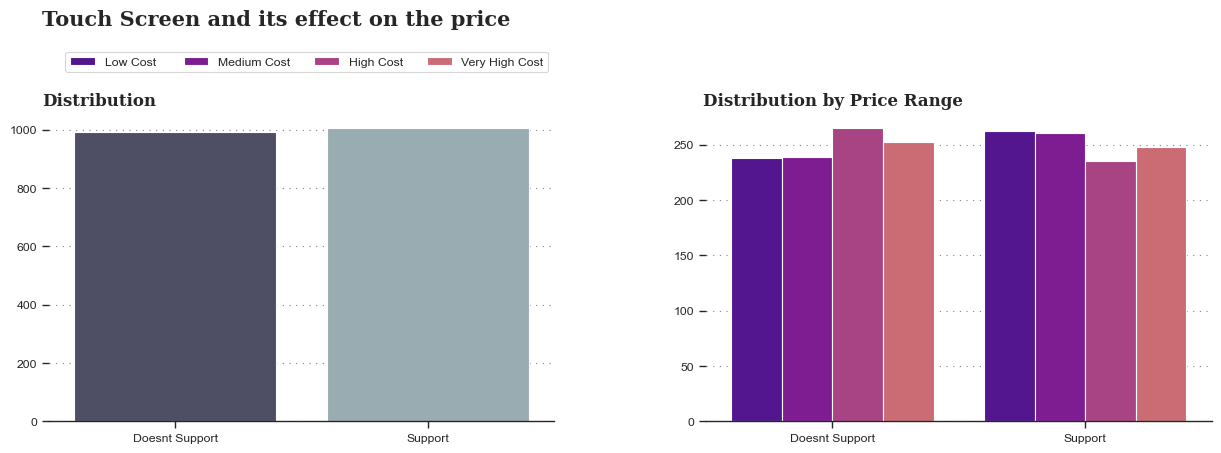

In [75]:
fig = plt.figure(figsize=(15,4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120,1.1,'Touch Screen and its effect on the price ', fontfamily='serif',fontsize=15, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


sns.countplot(x='touch_screen',
           data=df,
            palette='bone',
           ax=ax0)
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Doesnt Support","Support"])
ax0.set_xlabel("")
ax0.set_ylabel("")   

sns.countplot(x='touch_screen',
             data=df,
             hue='price_range',
             ax=ax1)
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.25,y=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_legend().remove()
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Low Cost ', 'Medium Cost','High Cost','Very High Cost'], ncol=4, bbox_to_anchor=(-0.30, 1.22))
ax1.set_xticklabels(["Doesnt Support","Support"])
ax1.set_xlabel("")
ax1.set_ylabel("")

fig.show()

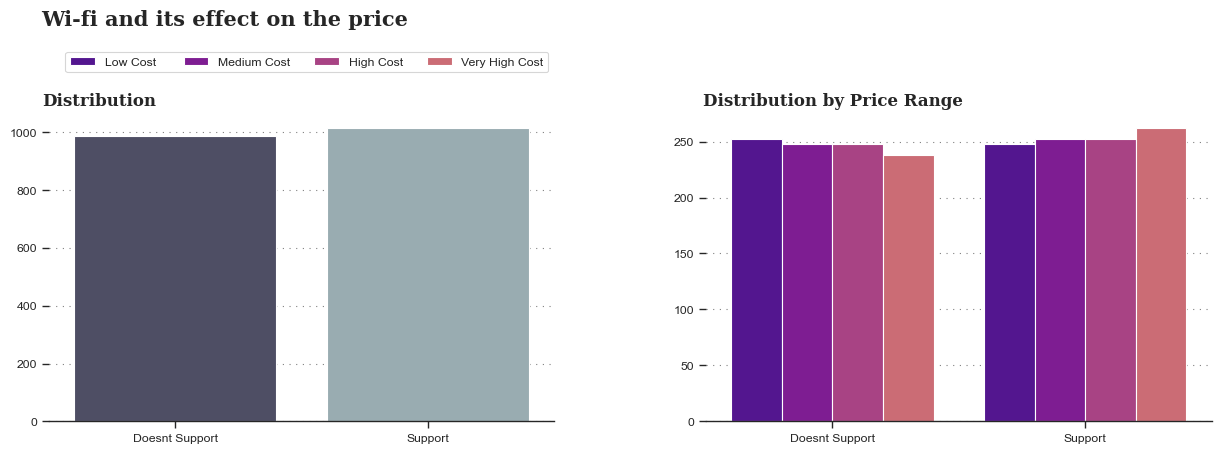

In [77]:
fig = plt.figure(figsize=(15,4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120,1.1,'Wi-fi and its effect on the price ', fontfamily='serif',fontsize=15, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


sns.countplot(x='wifi',
           data=df,
            palette='bone',
           ax=ax0)
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Doesnt Support","Support"])
ax0.set_xlabel("")
ax0.set_ylabel("")   

sns.countplot(x='wifi',
             data=df,
             hue='price_range',
             ax=ax1)
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.25,y=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_legend().remove()
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Low Cost ', 'Medium Cost','High Cost','Very High Cost'], ncol=4, bbox_to_anchor=(-0.30, 1.22))
ax1.set_xticklabels(["Doesnt Support","Support"])
ax1.set_xlabel("")
ax1.set_ylabel("")

fig.show()

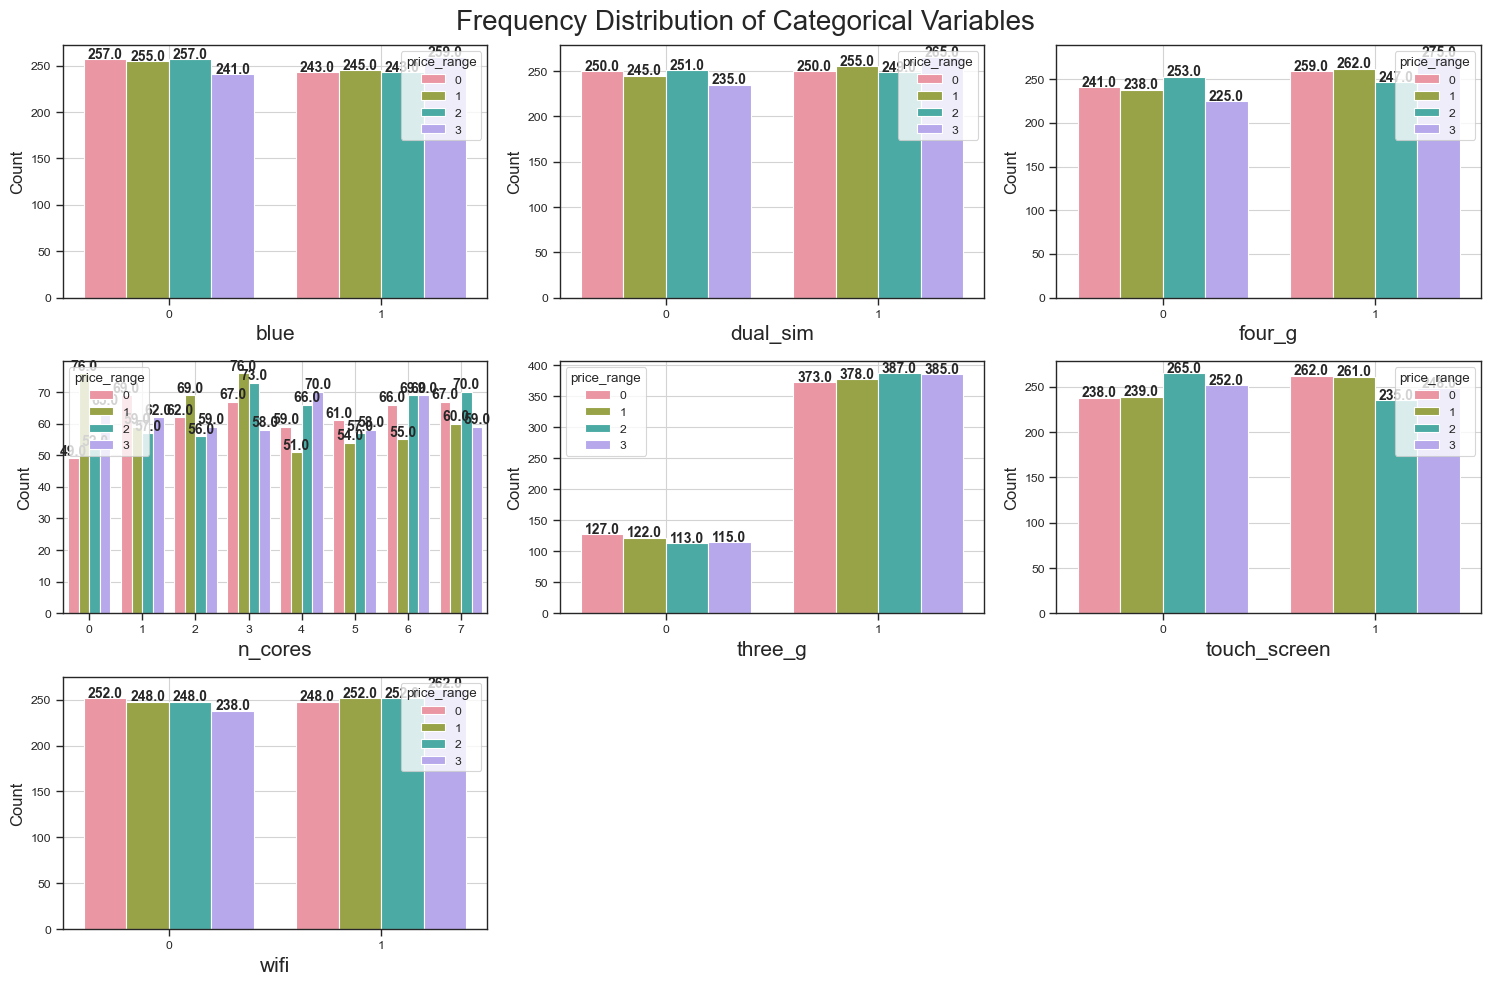

In [81]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,10), dpi=100)
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

for i in range(len(cat_columns)):
    row = i//3
    col = i%3               
    graph = sns.countplot(x=cat_columns[i],hue=df['price_range'],data=df, ax=ax[row,col])
    ax[row,col].set_xlabel(cat_columns[i], fontsize=15)
    ax[row,col].set_ylabel('Count', fontsize=12)
    ax[row,col].set_xticklabels(ax[row,col].get_xticks())
    ax[row,col].grid(color='lightgrey')      
    for j,p in enumerate(graph.patches):
        ax[row,col].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),
                             ha='center', fontsize=10 ,fontweight="bold")

plt.suptitle('Frequency Distribution of Categorical Variables', fontsize=20) 
ax[-1,2].axis('off')
ax[-1,1].axis('off')
plt.tight_layout()
plt.show()

## Insights: -

1-px_width and px_height:
We know that Screen size refers to the physical dimensions of a device’s display, measured in inches or centimeters. Screen resolution, on the other hand, refers to the number of pixels displayed on a screen, measured in pixels per inch (PPI) or pixels per centimeter (PPCM).
PPI = (resolution in pixels) / (screen size in inches)

According to the latest Compatibility Definition Document, the definition for screen configurations require that:

- Screens MUST be at least 2.5 inches in physical diagonal size
- Density MUST be at least 100 dpi
- The aspect ratio MUST be between 1.333 (4:3) and 1.779 (16:9)
- The display technology used consists of square pixels
- In practical terms, the lowest screen resolution currently being used is QVGA (240x320). There are a couple of phones that use this resolution including the HTC Tattoo and Wildfire. The smallest device I'm aware of is the 2.55" QVGA
- px_h:320
- px_w: 240

# 1. Histogram

A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis.The vertical y-axis represents the number count or percentage of occurrences in the data for each column

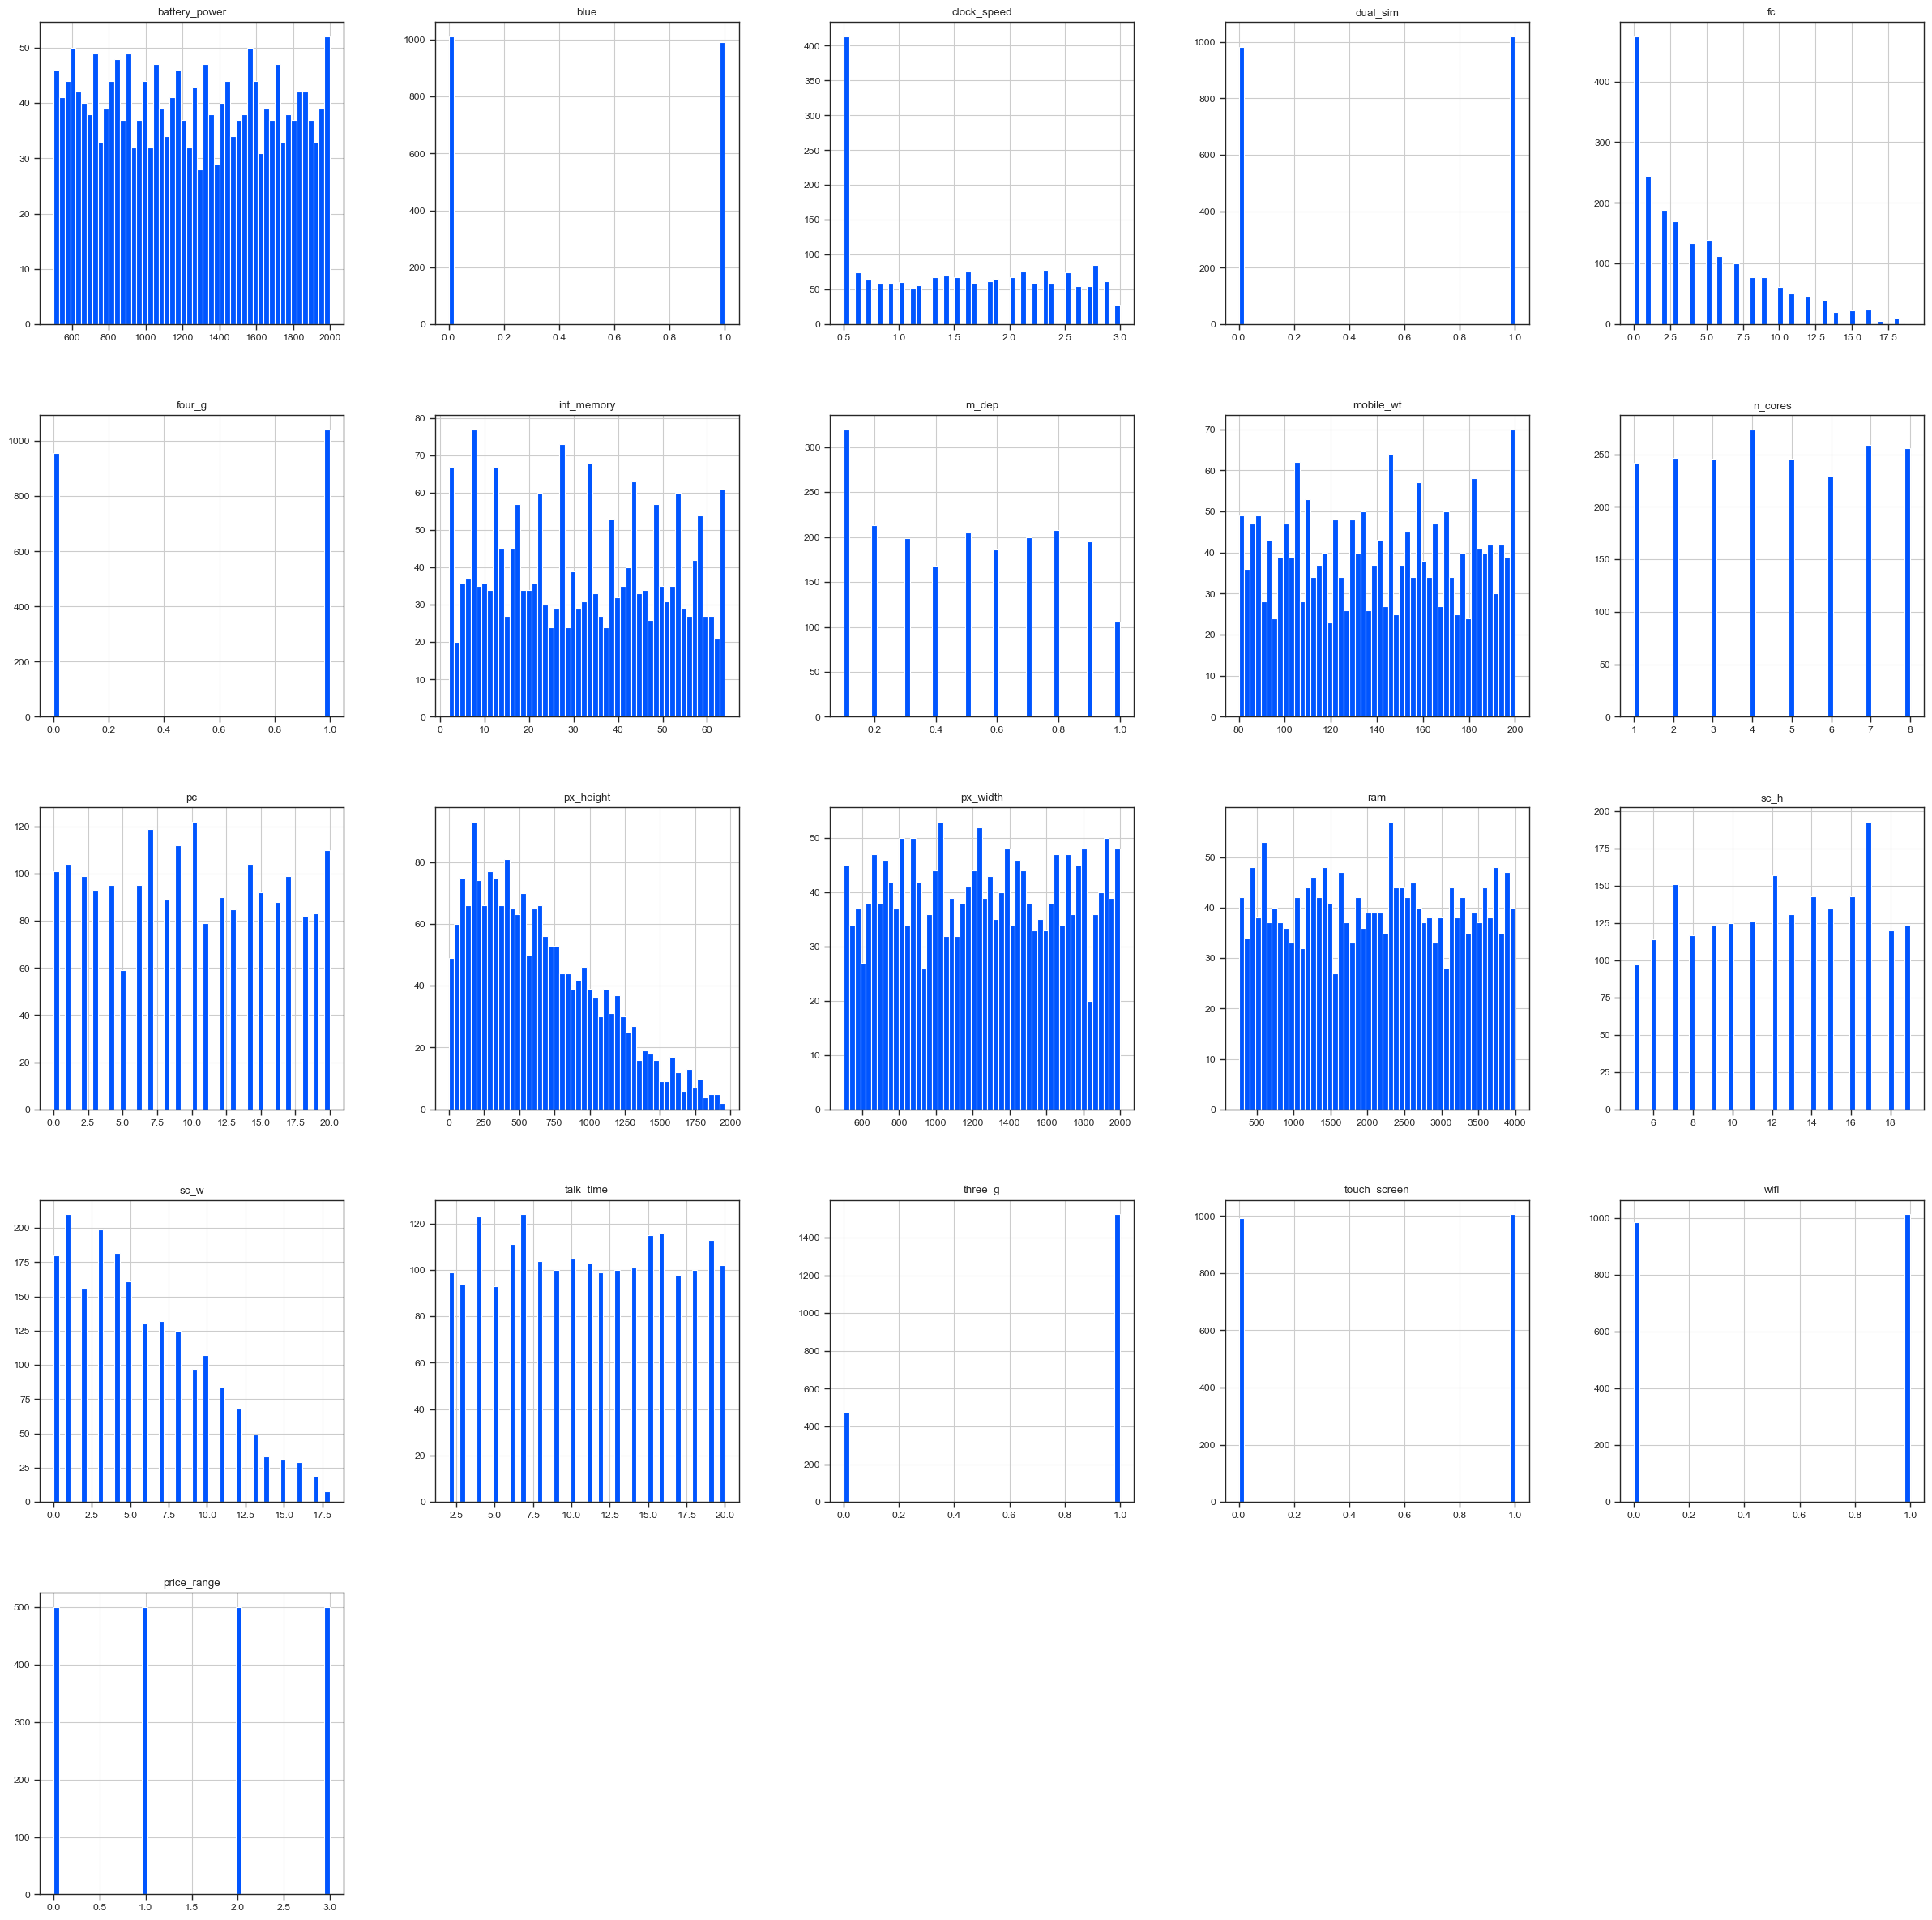

In [82]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(30,30))
plt.show()


### Histogram Insight: -

Histogram helps in identifying the following:
- View the shape of your data set’s distribution to look for outliers or other significant data points.

- Determine whether something significant has boccurred from one time period to another.

### Why Histogram? 

It is used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

From the above graphical representation we can identify that the highest bar represents the outliers which is above the maximum range.

We can also identify that the values are moving on the right side, which determines positive and the centered values determines normal skewness.

# 2. Distplot

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it 

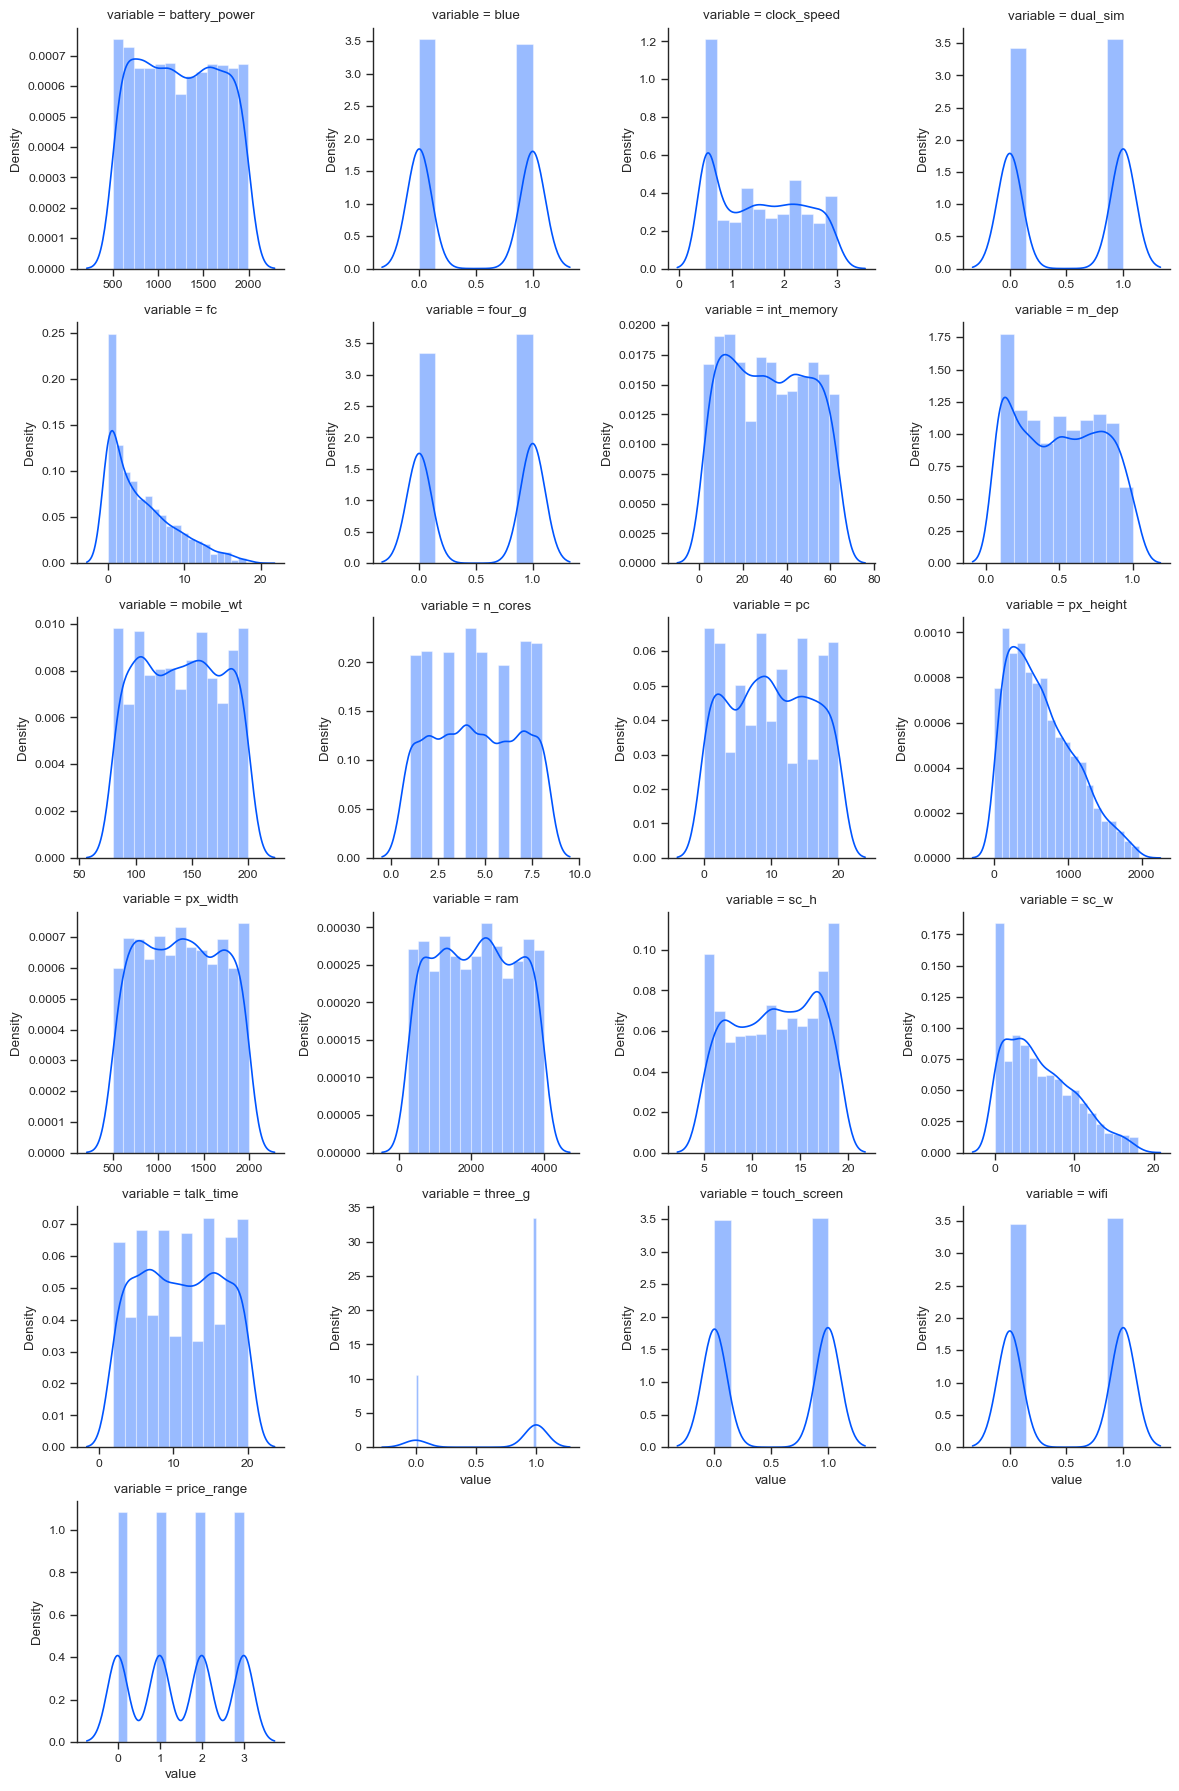

In [83]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

### Distplot Insights: -

Above is the distrution bar graphs to confirm about the statistics of the data about the skewness, the above results are:
1. 15 columns are positive skewed
2. 5 columns are negative skewed
2. 1 column is added here i.e price_range which is our target variable ~ which is also normal skewed. In that case we'll need to log transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables

### Why Distplot?
Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve. If the bell curve is shifted to the left or the right, it is said to be skewed.

We can observe that the bell curve is shifted to left we indicates positive skewness.As all the column are positively skewed we don't need to do scaling.

Let's proceed and check the distribution of the target variable.


In [84]:
#+ve skewed 
df['price_range'].skew()

0.0

#### The target variable is normal skewed.A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. 

# 3. Heatmap




A heatmap (or heat map) is a graphical representation of data where values are depicted by color.Heatmaps make it easy to visualize complex data and understand it at a glance 

__Correlation__ - A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.

Correlation can have a value:

- 1 is a perfect positive correlation
- 0 is no correlation (the values don't seem linked at all)
- -1 is a perfect negative correlation



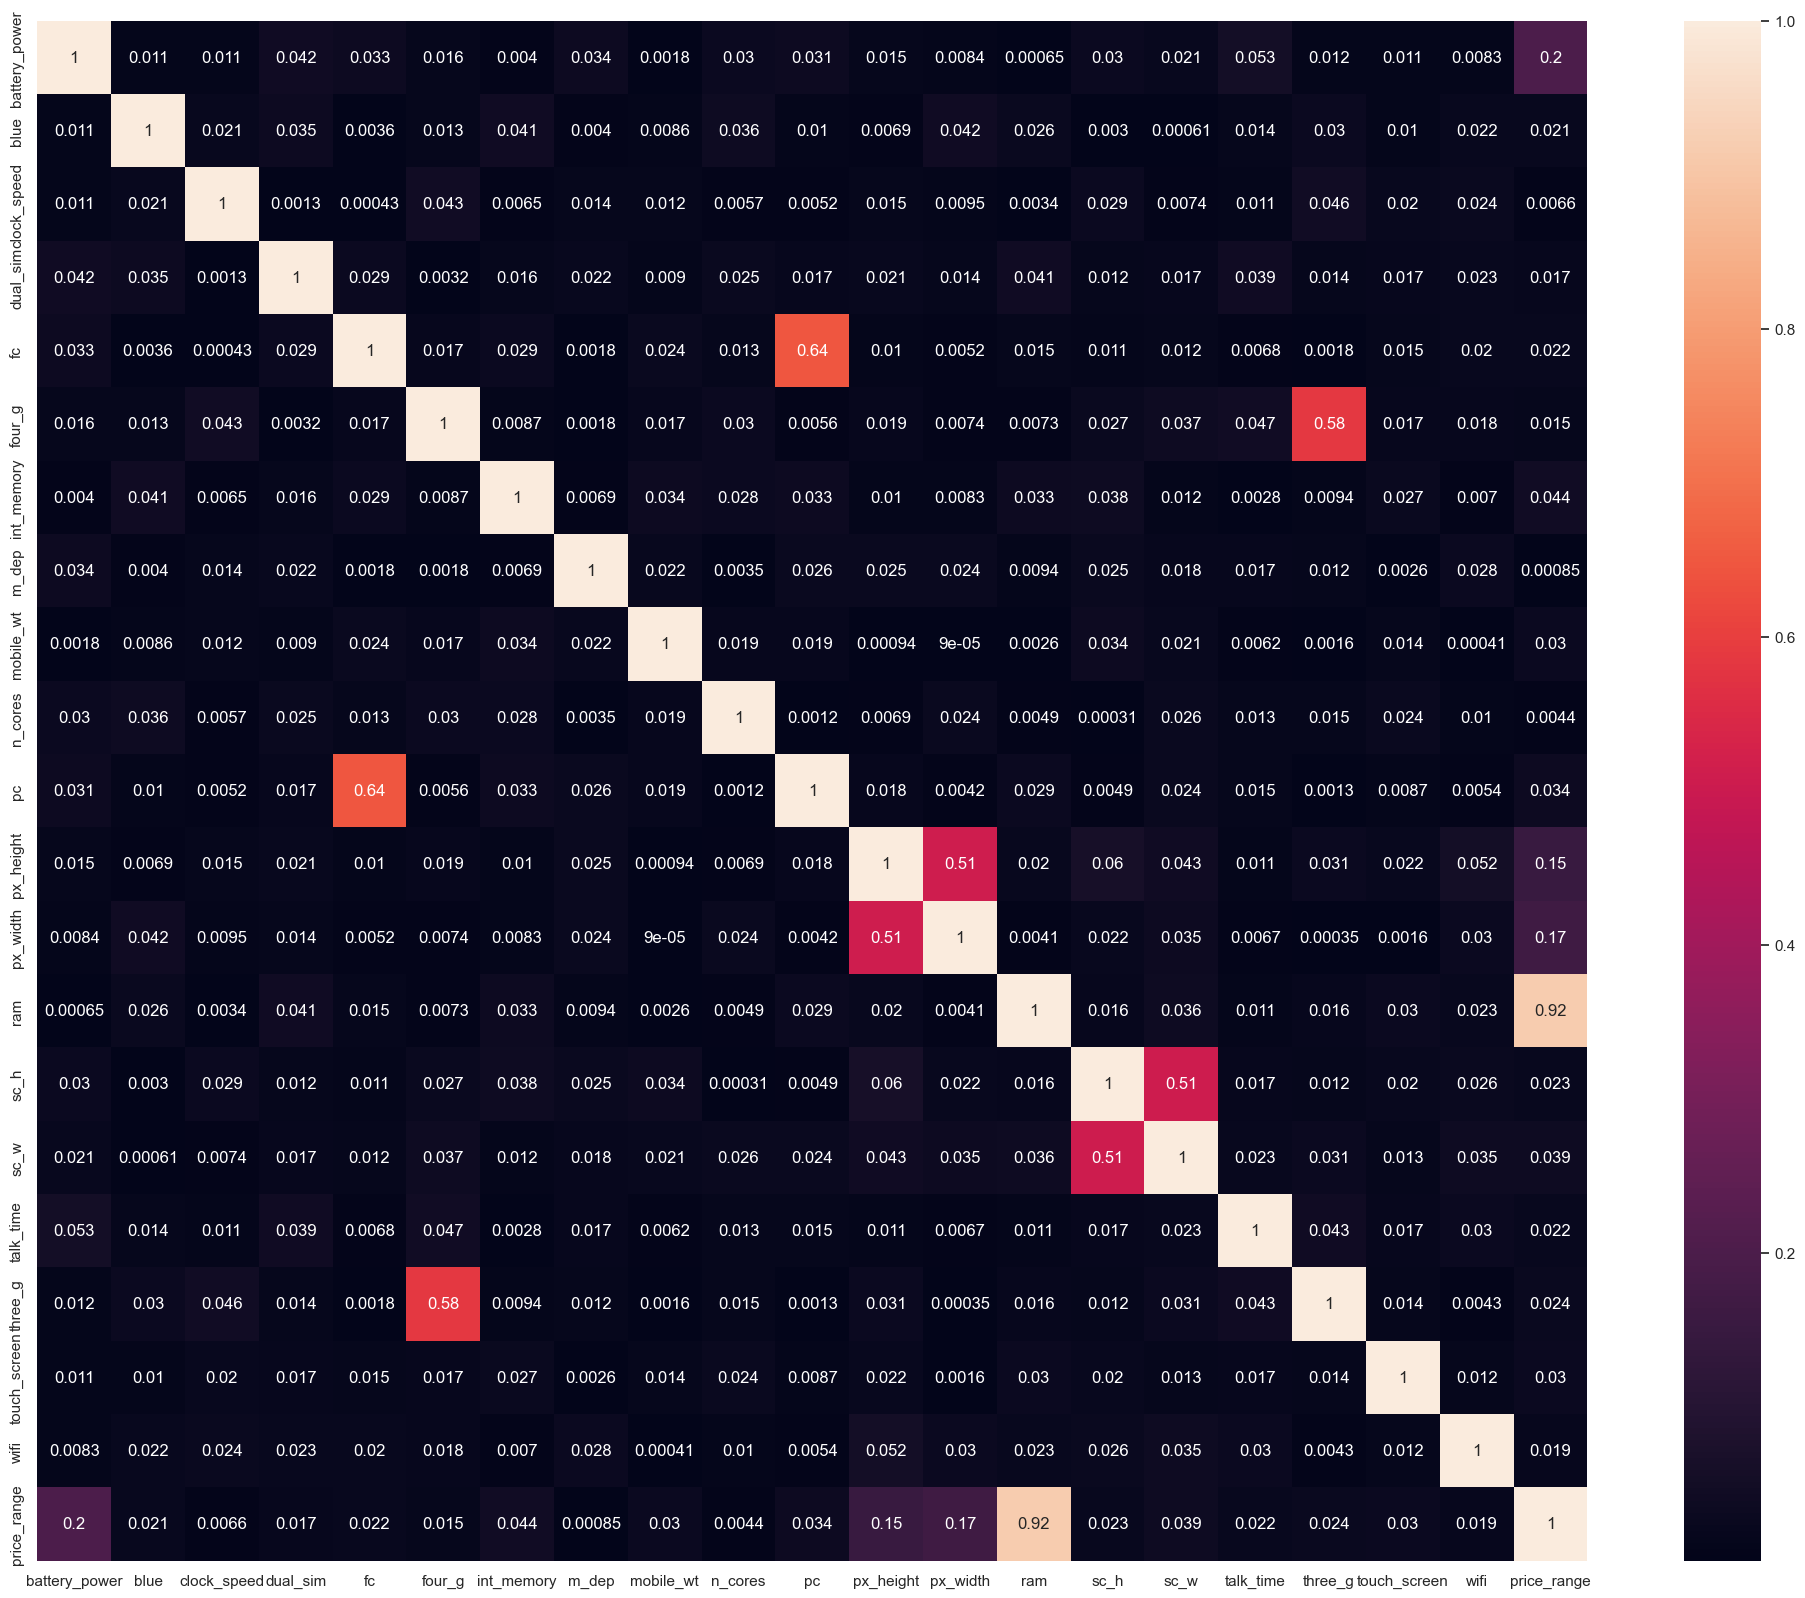

In [85]:
#correlation plot
sns.set(rc = {'figure.figsize':(25,20)})
corr = df.corr().abs()
sns.heatmap(corr,annot=True) 
plt.show()

In [86]:
corr

battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011252     0.011482  0.041847  0.033334   
blue                0.011252  1.000000     0.021419  0.035198  0.003593   
clock_speed         0.011482  0.021419     1.000000  0.001315  0.000434   
dual_sim            0.041847  0.035198     0.001315  1.000000  0.029123   
fc                  0.033334  0.003593     0.000434  0.029123  1.000000   
four_g              0.015665  0.013443     0.043073  0.003187  0.016560   
int_memory          0.004004  0.041177     0.006545  0.015679  0.029133   
m_dep               0.034085  0.004049     0.014364  0.022142  0.001791   
mobile_wt           0.001844  0.008605     0.012350  0.008979  0.023618   
n_cores             0.029727  0.036161     0.005724  0.024658  0.013356   
pc                  0.031441  0.009952     0.005245  0.017143  0.644595   
px_height           0.014901  0.006872     0.014523  0.020875  0.009990   
px_width            0.008402  0.041533     0.009476  0.014291  0.005176   
ram                 0.000653  0.026351     0.003443  0.041072  0.015099   
sc_h                0.029959  0.002952     0.029078  0.011949  0.011014   
sc_w                0.021421  0.000613     0.007378  0.016666  0.012373   
talk_time           0.052510  0.013934     0.011432  0.039404  0.006829   
three_g             0.011522  0.030236     0.046433  0.014008  0.001793   
touch_screen        0.010516  0.010061     0.019756  0.017117  0.014828   
wifi                0.008343  0.021863     0.024471  0.022740  0.020085   
price_range         0.200723  0.020573     0.006606  0.017444  0.021998   

                 four_g  int_memory     m_dep  mobile_wt   n_cores  ...  \
battery_power  0.015665    0.004004  0.034085   0.001844  0.029727  ...   
blue           0.013443    0.041177  0.004049   0.008605  0.036161  ...   
clock_speed    0.043073    0.006545  0.014364   0.012350  0.005724  ...   
dual_sim       0.003187    0.015679  0.022142   0.008979  0.024658  ...   
fc             0.016560    0.029133  0.001791   0.023618  0.013356  ...   
four_g         1.000000    0.008690  0.001823   0.016537  0.029706  ...   
int_memory     0.008690    1.000000  0.006886   0.034214  0.028310  ...   
m_dep          0.001823    0.006886  1.000000   0.021756  0.003504  ...   
mobile_wt      0.016537    0.034214  0.021756   1.000000  0.018989  ...   
n_cores        0.029706    0.028310  0.003504   0.018989  1.000000  ...   
pc             0.005598    0.033273  0.026282   0.018844  0.001193  ...   
px_height      0.019236    0.010441  0.025263   0.000939  0.006872  ...   
px_width       0.007448    0.008335  0.023566   0.000090  0.024480  ...   
ram            0.007313    0.032813  0.009434   0.002581  0.004868  ...   
sc_h           0.027166    0.037771  0.025348   0.033855  0.000315  ...   
sc_w           0.037005    0.011731  0.018388   0.020761  0.025826  ...   
talk_time      0.046628    0.002790  0.017003   0.006209  0.013148  ...   
three_g        0.584246    0.009366  0.012065   0.001551  0.014733  ...   
touch_screen   0.016758    0.026999  0.002638   0.014368  0.023774  ...   
wifi           0.017620    0.006993  0.028353   0.000409  0.009964  ...   
price_range    0.014772    0.044435  0.000853   0.030302  0.004399  ...   

               px_height  px_width       ram      sc_h      sc_w  talk_time  \
battery_power   0.014901  0.008402  0.000653  0.029959  0.021421   0.052510   
blue            0.006872  0.041533  0.026351  0.002952  0.000613   0.013934   
clock_speed     0.014523  0.009476  0.003443  0.029078  0.007378   0.011432   
dual_sim        0.020875  0.014291  0.041072  0.011949  0.016666   0.039404   
fc              0.009990  0.005176  0.015099  0.011014  0.012373   0.006829   
four_g          0.019236  0.007448  0.007313  0.027166  0.037005   0.046628   
int_memory      0.010441  0.008335  0.032813  0.037771  0.011731   0.002790   
m_dep           0.025263  0.023566  0.009434  0.025348  0.018388   0.017003   
mo

### Heatmap insights: -

As we know, it is recommended to avoid correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, hence increasing the risk of errors.




### Why Heatmap?

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.

# 4. Boxplot

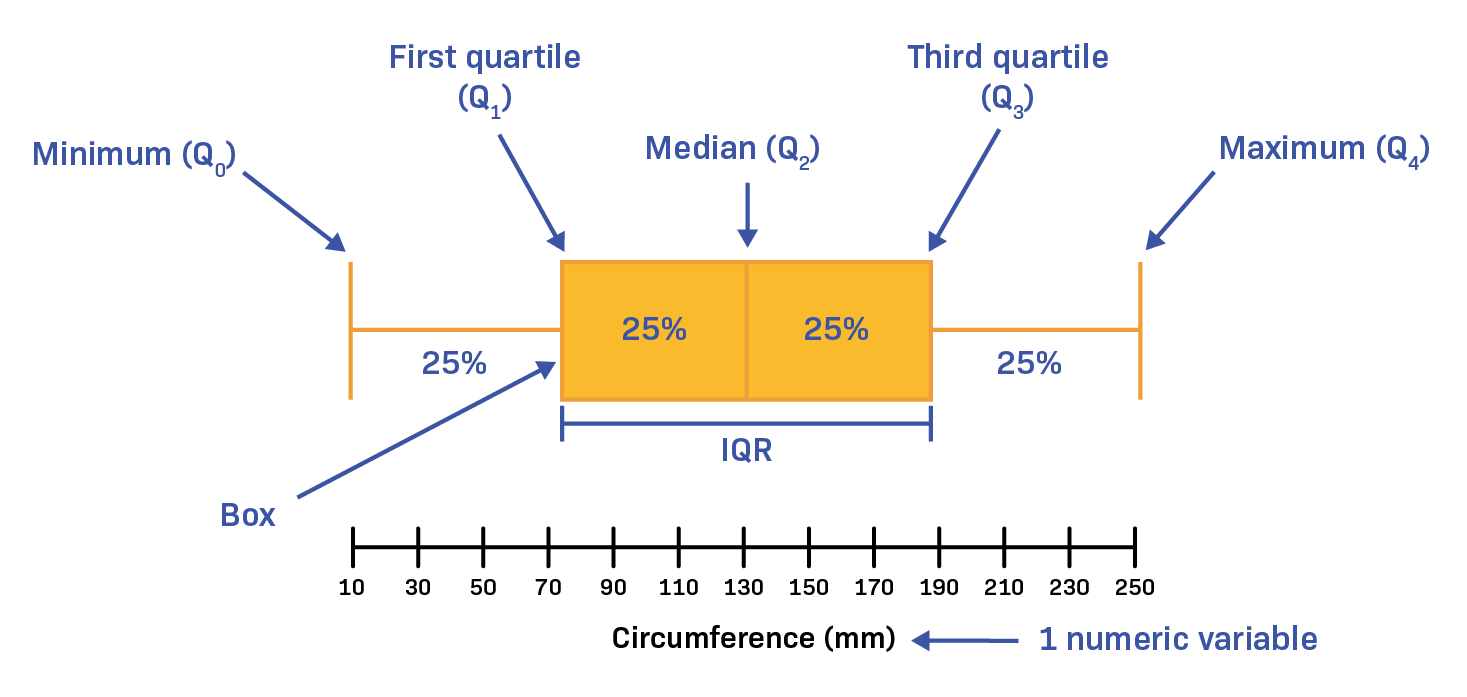

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”).

Basically, to find the outlier in a dataset/column.

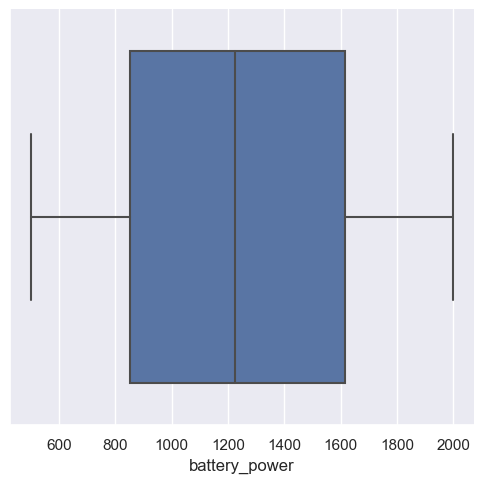

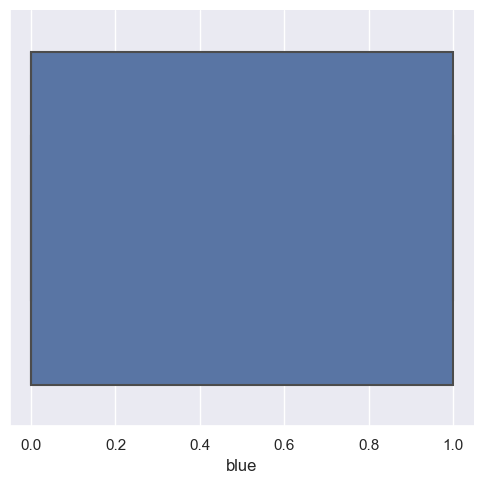

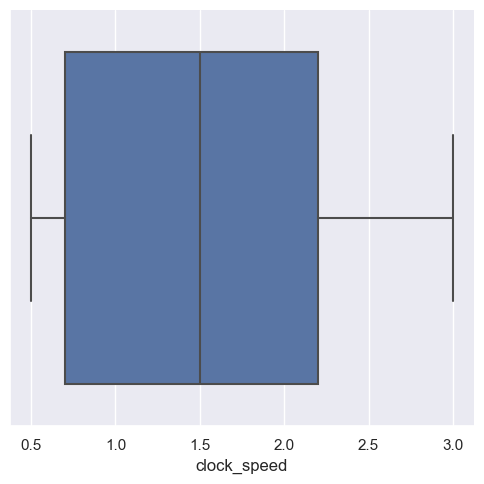

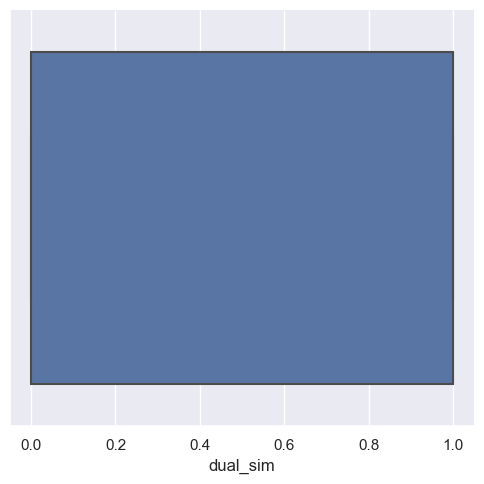

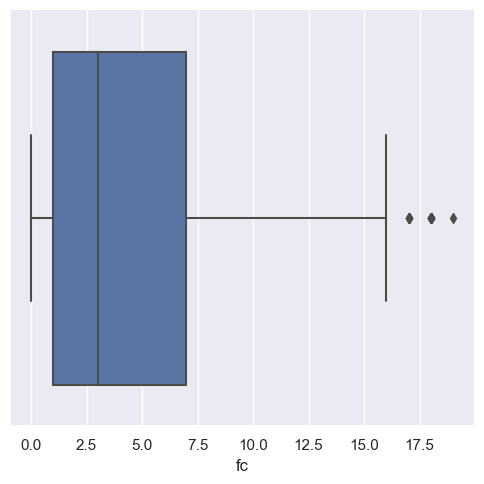

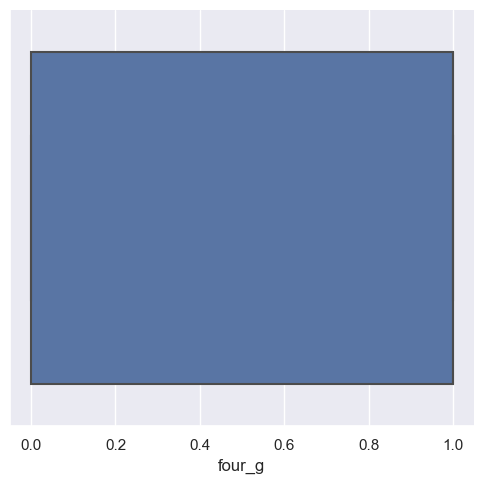

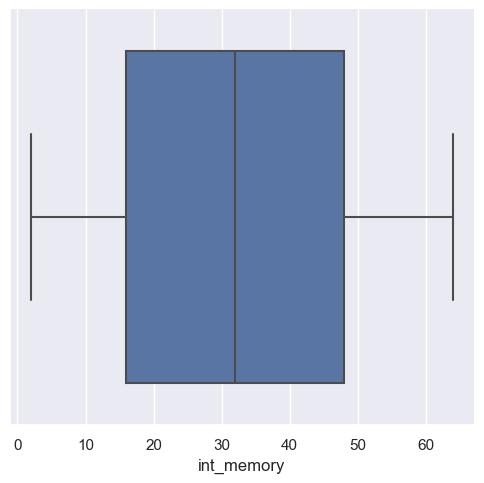

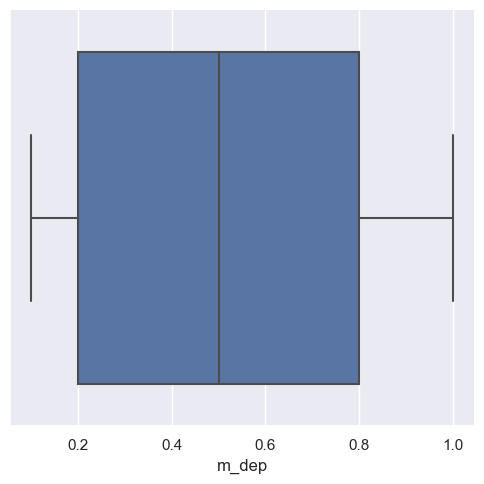

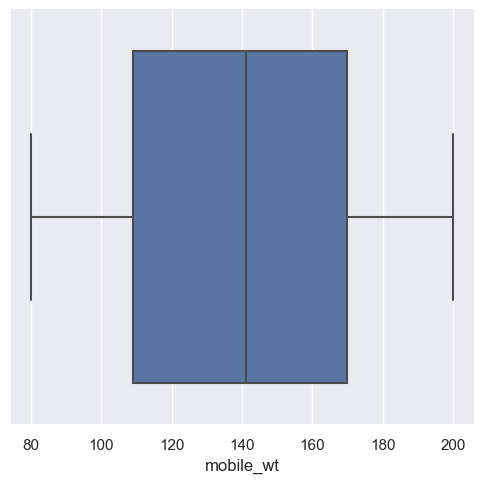

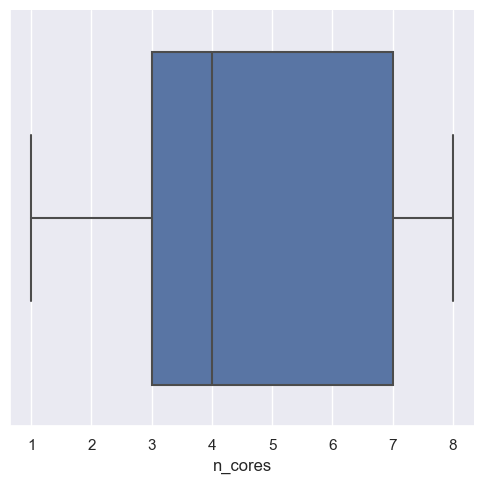

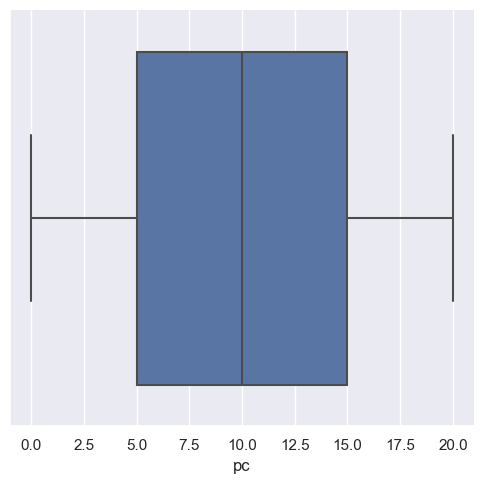

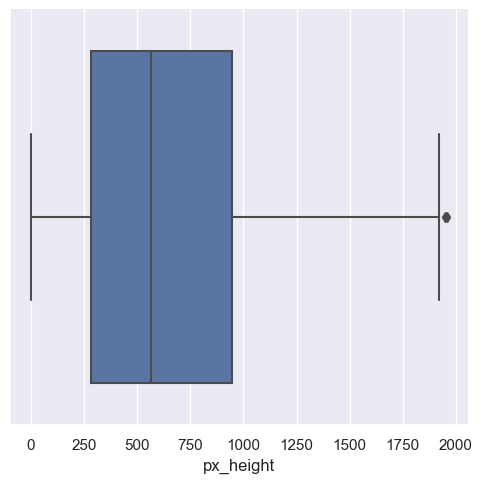

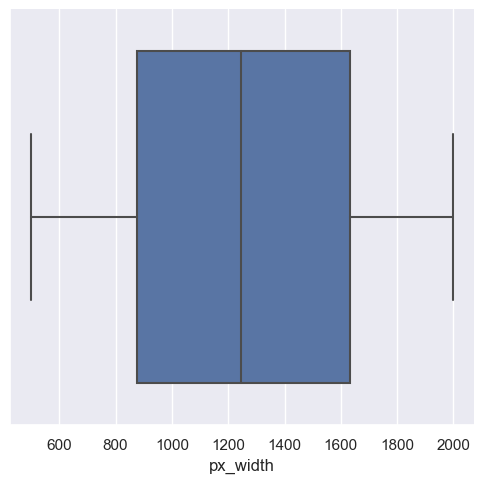

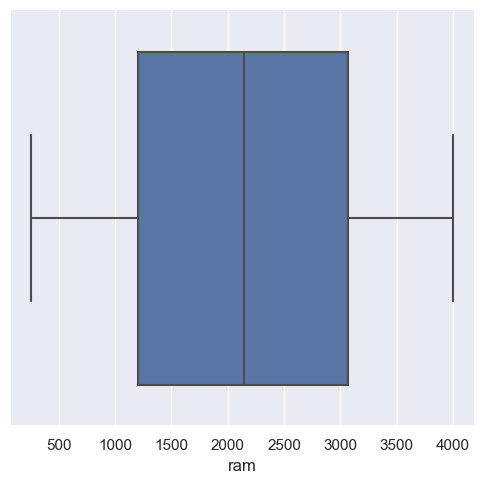

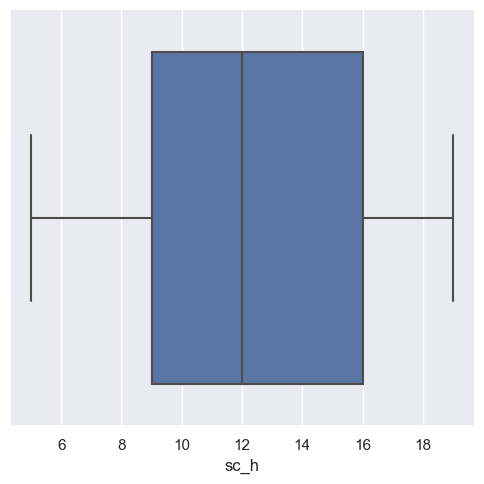

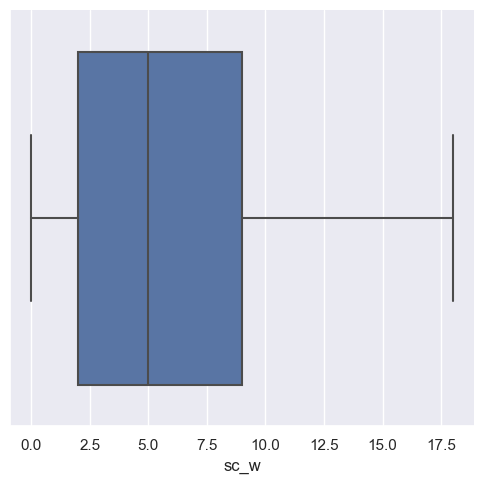

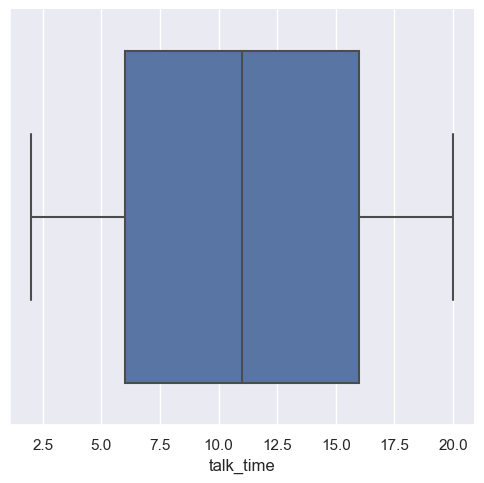

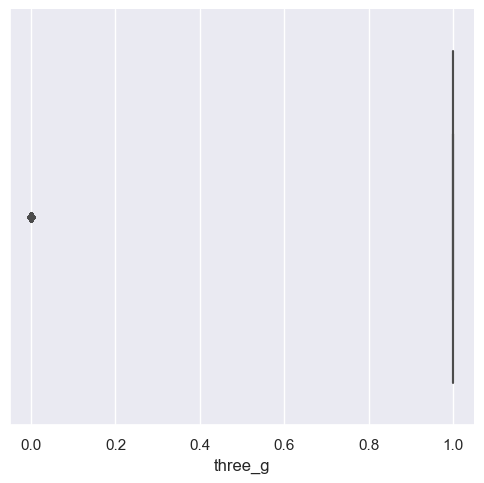

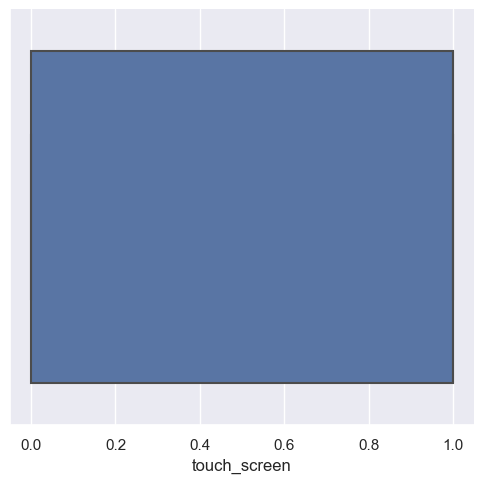

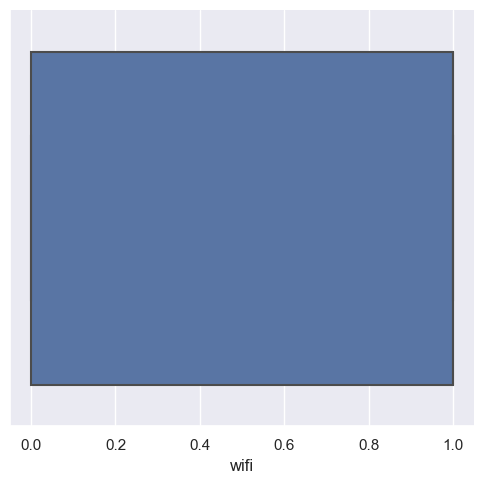

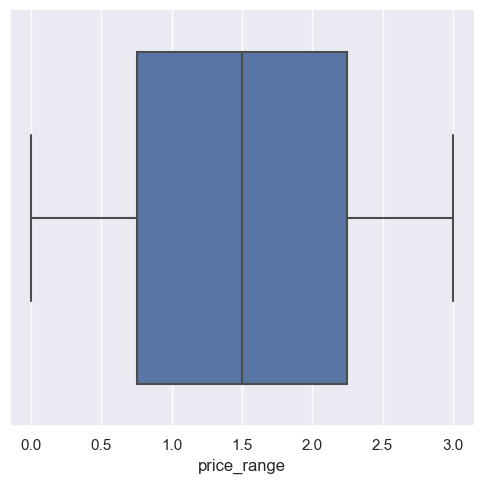

In [87]:
for value in columns:
    sns.catplot(data=df, x=value,  kind="box")

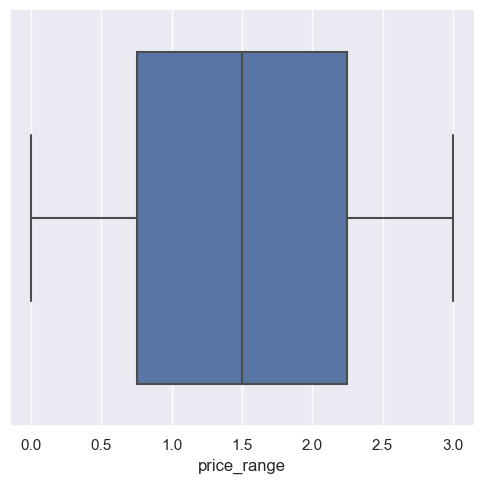

In [88]:
#for target variable
sns.catplot(data=df, x='price_range', kind='box')

#### The dark points are known as Outliers. Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

### Boxplot Insights: - 
- Sometimes outliers may be an error in the data and should be removed. In this case these points are correct readings yet they are different from the other points that they appear to be incorrect.

- The best way to decide wether to remove them or not is to train models with and without these data points and compare their validation accuracy.

- So we will keep it unchanged as it won't affect our model.

Here, we can see that most of the variables possess outlier values. It would take us days if we start treating these outlier values one by one. Hence, for now we'll leave them as is and let our algorithm deal with them. As we know, tree-based algorithms are usually robust to outliers.

### Why Boxplot?
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.



In the next step we will divide our cleaned data into training data and testing data.

# Step 2: Data Preparation
**Goal:-**

Tasks we are going to in this step:

1. Now we will spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.
2. Split dataset into train and test dataset.
3. Scaling on train dataset.

**1. Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.**

In [89]:
# Separate target and feature column in X and y variable

target = 'price_range'

# X will be the features
X = df.drop(target,axis=1) 
#y will be the target variable
y = df[target]

In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [91]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [92]:
# Check the shape of X and y variable
X.shape, y.shape

((2000, 20), (2000,))

In [93]:
# Reshape the y variable 
y = y.values.reshape(-1,1)

In [94]:
# Again check the shape of X and y variable
X.shape, y.shape

((2000, 20), (2000, 1))

#### 2. Spliting the dataset in training and testing data. 

*Here we are spliting our dataset into 80/20 percentage where 80% dataset goes into the training part and 20% goes into testing  part.*

In [95]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 20), (400, 20), (1600, 1), (400, 1))

### Insights: -

Train test split technique is used to estimate the performance of machine learning algorithms which are used to make predictions on data not used to train the model.It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced.

In the next step we will train our model on the basis of our training and testing data.

# Step 3: Model Training

#### Goal:
In this step we are going to train our dataset on different classification algorithms. As we know that our target variable is in discrete format so we have to apply classification algorithm. Target variable is a category like filtering.In our dataset we have the outcome variable or Dependent variable i.e Y having only two set of values, either M (Malign) or B(Benign). So we will use Classification algorithm**

__Algorithms we are going to use in this step__

1. Logistic Regression
2. KNearest Neighbor
3. Random Forest Classification

K-fold cross validation is a procedure used to estimate the skill of the model on new data. There are common tactics that you can use to select the value of k for your dataset. There are commonly used variations on cross-validation, such as stratified and repeated, that are available in scikit-learn

In [97]:
# Define kfold with 10 split
cv = KFold(n_splits=10, shuffle=True, random_state=42)

The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

# 1. Logistic Regression

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

#### Train set cross-validation 

In [98]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression

log_R = LogisticRegression() #Object Creation

log_R.fit(X_train, y_train)

LogisticRegression()

In [99]:
#Accuracy check of trainig data

#Get R2 score
log_R.score(X_train, y_train)


0.635625

In [100]:
#Accuracy of test data
log_R.score(X_test, y_test) 

0.6325

In [101]:
# Getting kfold values
lg_scores = -1 * cross_val_score(log_R, 
                                 X_train, 
                                 y_train, 
                                 cv=cv, 
                                 scoring='neg_root_mean_squared_error')
lg_scores

array([0.67082039, 0.62749502, 0.70267347, 0.59686682, 0.5809475 ,
       0.65669628, 0.63245553, 0.68920244, 0.59160798, 0.70267347])

In [102]:
# Mean of the train kfold scores
lg_score_train = np.mean(lg_scores)
lg_score_train

0.6451438891429125

### Prediction 

Now we will perform prediction on the dataset using Logistic Regression.

In [103]:
# Predict the values on X_test_scaled dataset 
y_predicted = log_R.predict(X_test)

## Various parameters are calculated for analysing the predictions.

1) Confusion Matrix
2)Classification Report
3)Accuracy Score
4)Precision Score
5)Recall Score
6)F1 Score

## Confusion Matrix

A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes. It plots a table of all the predicted and actual values of a classifier.

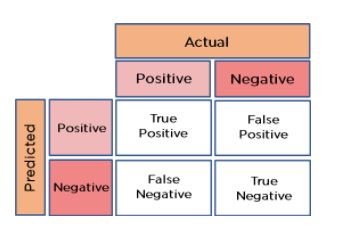

#### This diagram helps in understanding the concept of confusion matrix. 

In [104]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [105]:
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(29.75, 0.5, 'True Class')

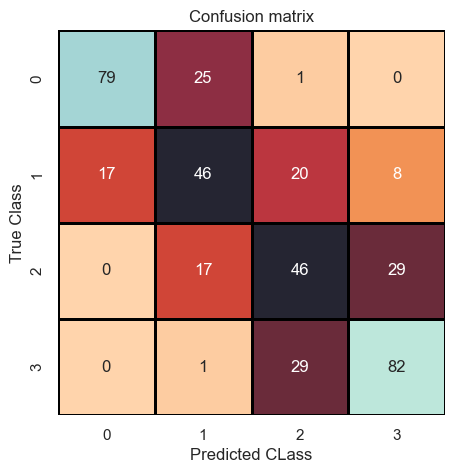

In [106]:
#We are creating Confusion Matrix on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.set(rc = {'figure.figsize':(5,5)})
sns.heatmap(cm,cmap = 'icefire_r', annot = True, cbar=False, linecolor='Black', linewidth = 2)

plt.title("Confusion matrix")

plt.xlabel('Predicted CLass')
plt.ylabel('True Class')


<AxesSubplot: >

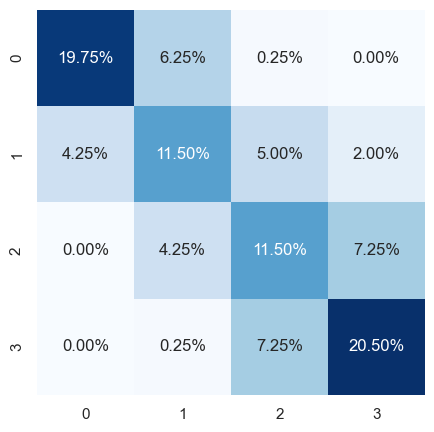

In [107]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

## Evaluating all kinds of evaluating parameters. 

#### Classification Report :
A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model. 

#### F1_score :
The F1 score is a machine learning metric that can be used in classification models. 

#### Precision_score :
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

#### Recall_score :
Recall score is used to measure the model performance in terms of measuring the count of true positives in a correct manner out of all the actual positive values. Precision-Recall score is a useful measure of success of prediction when the classes are very imbalanced.

In [108]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is Logistic Regression")
  
l_acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is: {}".format(l_acc))
 
prec = precision_score(y_test, y_predicted,average='micro')
print("The precision is: {}".format(prec))
  
rec = recall_score(y_test, y_predicted,average='micro')
print("The recall is: {}".format(rec))
  
f1 = f1_score(y_test, y_predicted,average='micro')
print("The F1-Score is: {}".format(f1))
  
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)      

The model used is Logistic Regression

The accuracy is: 0.6325
The precision is: 0.6325
The recall is: 0.6325
The F1-Score is: 0.6325
Classification Report is:

              precision    recall  f1-score   support

           0       0.82      0.75      0.79       105
           1       0.52      0.51      0.51        91
           2       0.48      0.50      0.49        92
           3       0.69      0.73      0.71       112

    accuracy                           0.63       400
   macro avg       0.63      0.62      0.62       400
weighted avg       0.64      0.63      0.63       400



# 2. K Nearest Neighbor

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm

In [109]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [110]:
#Accuracy check of trainig data
#Get R2 score
classifier.score(X_train, y_train)

0.955

In [111]:
#Accuracy of test data
classifier.score(X_test, y_test) 

0.9425

In [112]:
#Get kfold values
Nn_scores = -1 * cross_val_score(classifier, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
Nn_scores


array([0.28504386, 0.28504386, 0.20916501, 0.37914377, 0.27386128,
       0.30618622, 0.15811388, 0.26220221, 0.31622777, 0.23717082])

In [113]:
# Mean of the train kfold scores
Nn_score_train = np.mean(Nn_scores)
Nn_score_train

0.27121586735665687

### Prediction

In [114]:
# Predict the values on X_test_scaled dataset 
y_predicted = classifier.predict(X_test)

In [115]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [116]:
#Confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(29.75, 0.5, 'True Class')

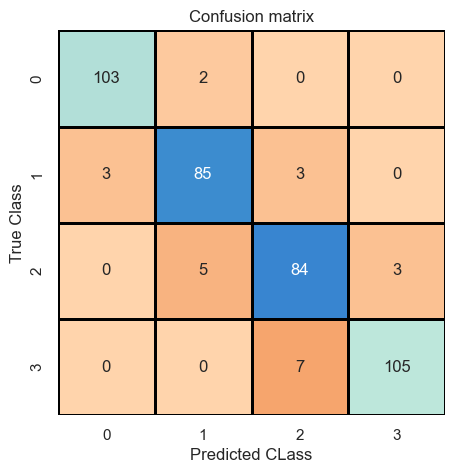

In [117]:
#We are drawing cm on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.heatmap(cm,cmap = 'icefire_r', annot = True, fmt= 'd', cbar=False, linecolor='Black', linewidth = 2)
plt.title("Confusion matrix")

plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

<AxesSubplot: >

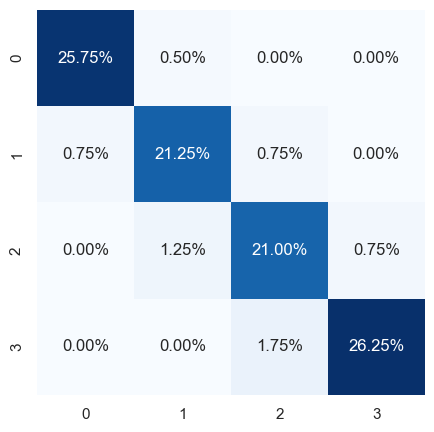

In [118]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

### Evaluating all kinds of evaluating parameters. 

In [119]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is KNeighbors Classifier")
  
k_acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is: {}".format(k_acc))
  
prec = precision_score(y_test, y_predicted,average='micro')
print("The precision is: {}".format(prec))
  
rec = recall_score(y_test, y_predicted,average='micro')
print("The recall is: {}".format(rec))
  
f1 = f1_score(y_test, y_predicted,average='micro')
print("The F1-Score is: {}".format(f1))
  
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)    

The model used is KNeighbors Classifier

The accuracy is: 0.9425
The precision is: 0.9425
The recall is: 0.9425
The F1-Score is: 0.9425
Classification Report is:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       105
           1       0.92      0.93      0.93        91
           2       0.89      0.91      0.90        92
           3       0.97      0.94      0.95       112

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



# 3. Random Forest Classifier

Random Forest is a powerful and versatile supervised machine learning algorithm that grows and combines multiple decision trees to create a “forest.” It can be used for both classification and regression problems in R and Python.

Random Forest and Decision Tree Algorithm are considered best for the data that has outliers.

In [120]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
#clas = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clas = RandomForestClassifier()
clas.fit(X_train, y_train)


RandomForestClassifier()

In [121]:
#Accuracy check of trainig data
#Get R2 score
clas.score(X_train, y_train)

1.0

In [122]:
#Accuracy of test data
clas.score(X_test, y_test) 

0.885

In [123]:
# Get kfold values
Dta_scores = -1 * cross_val_score(clas, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    scoring='neg_root_mean_squared_error')
Dta_scores


array([0.37914377, 0.31622777, 0.41833001, 0.4472136 , 0.3354102 ,
       0.37080992, 0.3354102 , 0.34460122, 0.35355339, 0.35355339])

In [124]:
# Mean of the train kfold scores
Dta_score_train = np.mean(Dta_scores)
Dta_score_train

0.36542534645799346

### Prediction 

In [125]:
# predict the values on X_test_scaled dataset 
y_predicted = clas.predict(X_test)

In [126]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix

In [127]:
#confusion matrix btw y_test and y_predicted
cm = confusion_matrix(y_test,y_predicted)

Text(29.75, 0.5, 'True Class')

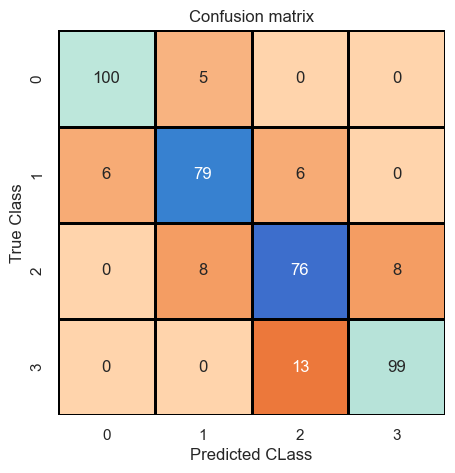

In [128]:
#We are drawing cm on heatmap to have better understanding 
# sns.heatmap(cm,cmap = 'Red') ~ to check for available colors
sns.heatmap(cm,cmap = 'icefire_r', annot = True, fmt= 'd', cbar=False, linecolor='Black', linewidth = 2)
plt.title("Confusion matrix")

plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

<AxesSubplot: >

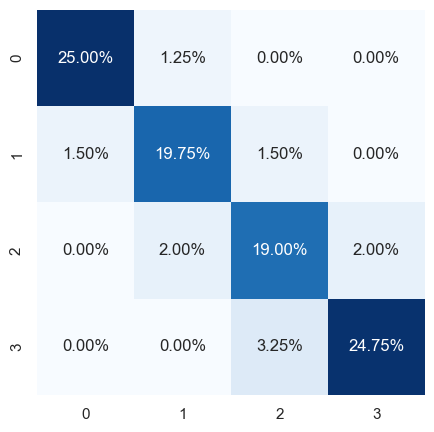

In [129]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)

### Evaluating all kinds of evaluating parameters. 

In [130]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score
from sklearn.metrics import confusion_matrix
  

print("The model used is Random Forest Classifier")
  
r_acc = accuracy_score(y_test, y_predicted)
print("\nThe accuracy is {}".format(r_acc))
  
prec = precision_score(y_test, y_predicted,average='micro')
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, y_predicted,average='micro')
print("The recall is {}".format(rec))
  
f1 = f1_score(y_test, y_predicted,average='micro')
print("The F1-Score is {}".format(f1))
 
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)  

The model used is Random Forest Classifier

The accuracy is 0.885
The precision is 0.885
The recall is 0.885
The F1-Score is 0.885
Classification Report is:

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       105
           1       0.86      0.87      0.86        91
           2       0.80      0.83      0.81        92
           3       0.93      0.88      0.90       112

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.89      0.89       400



# Insight: -

In [131]:
cal_metric=pd.DataFrame([l_acc,k_acc,r_acc],columns=["Score in percentage"])
cal_metric.index=['Logistic Regression',
                  'K-nearest Neighbors',
                  'Random Forest']
cal_metric

Score in percentage
Logistic Regression               0.6325
K-nearest Neighbors               0.9425
Random Forest                     0.8850


- As you can see with our Logistic Regression Model and K-nearest Neighbors model we are getting accuracy of 94.25%.
- So we gonna save our model with Logistic Regression

# Step 4: Save Model
**Goal:- In this step we are going to save our model in pickel format file.**

In [132]:
import pickle
pickle.dump(log_R , open('Mobile_Price_Prediction_LogisticRegression.pkl', 'wb'))
pickle.dump(classifier , open('Mobile_Price_Prediction_KNearestNeighbor.pkl', 'wb'))
pickle.dump(clas , open('Mobile_Price_Prediction_RandomForest.pkl', 'wb'))

In [133]:
import pickle

def model_prediction(features):
    
    pickled_model = pickle.load(open('Mobile_Price_Prediction_LogisticRegression.pkl', 'rb'))
    Price = str(list(pickled_model.predict(features)))
    
    return str(f'The Mobile Price is {Price}')

#### We can test our model by giving our own parameters or features to predict. 

In [134]:
battery_power = 842
blue = 0
clock_speed = 2.2
dual_sim = 0
fc = 1
four_g = 0
int_memory = 7
m_dep = 0.6
mobile_wt = 188
n_cores = 2
pc = 2
px_height = 20
px_width = 756
ram = 2549
sc_h = 9
sc_w = 7
talk_time = 19
three_g = 0
touch_screen = 0
wifi = 1

In [135]:
model_prediction([[battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi]])

'The Mobile Price is [1]'

0 ~ Low
1 ~ Medium
2 ~ High
3 ~ Very High 

# Step 5: After making model and checking its accuracy, we are going to deploy it in API/ Web App. 

This step holds a great importance as in this step we make a Web API which integrates our model and let it interacts with user.
The user simply put data he is asked to fill and our API will help in predicting.

### There are many methods to create Web Application like Flask, Streamlit, etc. We going to use streamlit to create API. Below is an API refrence. 

https://tinyurl.com/bdexnk6v

# Conclusion

After observing the problem statement we have build an efficient model to overcome it. The above model helps in classifying the price of the Mobile. It helps the customer in purchasing the Mobile Phone according to their budget.The accuracy of the model is 94.25%.  